**Background & Motivation**

Heart disease is one of the leading causes of death in the United States. While most existing research emphasizes demographic or medical factors—such as age, race, or clinical risk—we aim to examine a different dimension. This study explores whether financial conditions, including economic performance (e.g., GDP growth) and financial security (income stability and market volatility), are associated with heart-disease mortality.

**Research Question**  


This project explores whether economic stress, financial well-being and financial market uncertainty are associated with changes in heart-disease mortality across U.S. counties.

We analyze three financial and economic dimensions:

- **Local Economic Performance** (GDP growth, unemployment rate, uninsured rate)
- **Household Financial Stability** (income levels)
- **Financial Market Volatility** (VIX index)

**Data Selection for Analysis**

This project uses multiple datasets to study how financial and economic factors relate to heart-disease mortality.  
Across all hypotheses, we selected datasets that meet the following criteria:

*  **County/State median income**
*  **Market volatility index**
*  **GDP growth rate**
*  **County uninsured rate**
*  **County unemployment rate**
*  **Heart disease mortality rate**

Select those dataset to evaluate how different forms of financial stress relate to heart-disease mortality over time.
Use year as a time dimension to observe trends and changes over time.

### Description of dataset(s)

#### Base county–year panel (`panel_us`, `panel_ca`)
- One row for each **county–year** in the US (later restricted to **California** only).
- Columns include county identifiers, heart-disease mortality rate, local unemployment rate, and annual summary statistics of the VIX “fear index” (financial-market stress).

#### Crisis-period change datasets (`crisis_2008`, `crisis_2020`)
- One row for each **California county**, summarizing average **pre-crisis vs post-crisis** heart-disease mortality and unemployment, plus the **changes (deltas)** between those periods.
- These are the datasets used for the “Δ Unemployment vs Δ HD mortality” scatterplots and the prediction models.

#### State-level socio-economic datasets
- One row per **state–year** with heart-disease mortality and median household income, plus a county-level dataset of uninsured rates.
- These are used for descriptive plots of income vs mortality and uninsured rate vs mortality.

---

### Key variables of interest – Data dictionary

| Variable name                | Type                  | Unit / scale           | Definition |
|-----------------------------|-----------------------|------------------------|-----------|
| `fips`                      | Categorical (string)  | 5-digit code           | Federal Information Processing Standard code uniquely identifying each county. |
| `state_abbr`                | Categorical           | –                      | Two-letter state abbreviation (e.g., CA). |
| `county_name`               | Categorical           | –                      | County name (e.g., Alameda County). |
| `year`                      | Integer               | Calendar year          | Observation year (2003–2020 in the base panel). |
| `hd_rate`                   | Numeric               | Deaths per 100,000     | Crude heart-disease mortality rate for that county–year. |
| `unemp_rate`                | Numeric               | Percent (%)            | Annual unemployment rate for that county–year. |
| `vix_mean`                  | Numeric               | Index level            | Average daily VIX value in that year (proxy for financial-market stress). |
| `vix_max`                   | Numeric               | Index level            | Maximum daily VIX value in that year. |
| `vix_std`                   | Numeric               | Index units            | Standard deviation of daily VIX (volatility of stress). |
| `num_days_vix_gt_40`        | Integer               | Days                   | Number of trading days in the year when VIX > 40 (extreme stress). |
| `stress_index`              | Numeric               | Normalized index       | Composite index = normalized `vix_mean` + `vix_std` + `num_days_vix_gt_40`; higher values = more market stress. |
| `hd_pre_2008`, `hd_post_2008` | Numeric             | Deaths per 100k        | County’s average HD mortality before (2006–07) and after (2009–10) the 2008 crisis. |
| `u_pre_2008`, `u_post_2008` | Numeric               | Percent (%)            | County’s average unemployment rate before and after the 2008 crisis. |
| `delta_hd_2008`             | Numeric               | Deaths per 100k        | Change in HD mortality = `hd_post_2008 – hd_pre_2008`. |
| `delta_u_2008`              | Numeric               | Percentage points      | Change in unemployment = `u_post_2008 – u_pre_2008`. |
| `worsen_2008`               | Binary (0/1)          | –                      | 1 if `delta_hd_2008 > 0` (mortality worsened), 0 otherwise. |
| `Median_Income_2018` (etc.) | Numeric               | USD                    | Median household income by state in a given year. |
| `uninsured_average_by_county` | Numeric             | Percent (%)            | Share of county population without health insurance. |
| `RATE` (state mortality file) | Numeric             | Deaths per 100,000     | State-level HD mortality rate for a given year. |

---

### Unit of analysis

Because we transform the data several times, we state the unit of analysis for each stage:

#### Base panel (`panel_us`, `panel_ca`)
- **Unit of analysis:** County–year  
- **Each row represents:** One specific county in one specific year (e.g., Los Angeles County in 2009) with its HD mortality rate, unemployment rate, and the national VIX stress measures for that year.

#### Crisis-period change datasets (`crisis_2008`, `crisis_2020`)
- **Unit of analysis:** County (California)  
- **Each row represents:** One county, summarizing its average pre-crisis HD mortality and unemployment, post-crisis values, and the change between the two periods.

#### ML datasets (`ml_2008`, `ml_2020`)
- **Unit of analysis:** County (California)  
- **Each row represents:** One county with predictors (`hd_pre_*`, `u_pre_*`, `delta_u_*`) and a binary label (`worsen_*`) indicating whether heart-disease mortality increased during that crisis.


# H1: County-level economic stress measured by GDP growth, unemployment, and uninsured rates—is linked to age-adjusted heart-disease mortality in the U.S.
(Mike and Lynnie)

### H1 Data Cleaning (Mike and Lynn)

1.Heart Disease Mortality rate in 2012,2014,2016,2018 (Data imported and cleaned by Mike)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Using files.upload() to upload the collected raw dataset

In [2]:
df = pd.read_csv("Heart Disease Mortality Rate.csv", encoding="latin1")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Heart Disease Mortality Rate.csv'

In [3]:
#This confirms no missing County Code exists anymore
df_mortrate = df[df['County Code'].notna()]

NameError: name 'df' is not defined

In [4]:
#To convert County Code into a 5-digit FIPS code (string format).
df_mortrate['fips'] = df_mortrate['County Code'].astype(str).str.split('.').str[0].str.zfill(5)

NameError: name 'df_mortrate' is not defined

In [ ]:
df_mortrate = df_mortrate.rename(columns={'Age Adjusted Rate': 'heart_mortality_rate'})

In [ ]:
#Keep all the columns we want
df_mortrate= df_mortrate[['fips', 'County', 'Year', 'heart_mortality_rate']]

In [ ]:
#Properly format the column ['Year'] and ['heart_mortality_rate']
df_mortrate['Year'] = df_mortrate['Year'].astype(int)
df_mortrate['heart_mortality_rate'] = pd.to_numeric(df_mortrate['heart_mortality_rate'], errors='coerce')

In [ ]:
df_mortrate = df_mortrate.sort_values(['fips', 'Year'])
df_mortrate.head()

,fips,County,Year,heart_mortality_rate
0,01001,"Autauga County, AL",2008,271.4
1,01001,"Autauga County, AL",2012,232.2
2,01001,"Autauga County, AL",2014,208.3
3,01001,"Autauga County, AL",2016,206.6
4,01001,"Autauga County, AL",2018,191.7


2. unemployment rate (data collection and cleaning by Lynn and Mike)

In [ ]:
df_unemp = pd.read_excel("unemployment.xls")

In [ ]:
df_unemp.head()

,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%),Segment,State
0,CN0602500000000,6,25,"Imperial County, CA",2012,79116,57399,21717,27.4,Very High,CA
1,CN7212300000000,72,123,"Salinas Municipio, PR",2014,8312,6121,2191,26.4,Very High,PR
2,CN7208300000000,72,83,"Las Marias Municipio, PR",2014,2901,2167,734,25.3,Very High,PR
3,CN7210900000000,72,109,"Patillas Municipio, PR",2012,5462,4090,1372,25.1,Very High,PR
4,CN7205500000000,72,55,"Guanica Municipio, PR",2014,4483,3364,1119,25.0,Very High,PR


In [5]:
df_unemp_clean = df_unemp.copy()
#We will need the following columns for our cleaning process
df_unemp_clean = df_unemp_clean[[
    'State FIPS Code',
    'County FIPS Code',
    'County Name/State Abbreviation',
    'Year',
    'Unemployment Rate (%)'
]]

NameError: name 'df_unemp' is not defined

In [ ]:
df_unemp_clean = df_unemp_clean.rename(columns={
    'State FIPS Code': 'state_fips',
    'County FIPS Code': 'county_fips',
    'County Name/State Abbreviation': 'county',
    'Unemployment Rate (%)': 'unemployment_rate'
})

In [ ]:
### Convert fips to 5-digit FIPS
df_unemp_clean['state_fips'] = df_unemp_clean['state_fips'].astype(int).astype(str).str.zfill(2)
df_unemp_clean['county_fips'] = df_unemp_clean['county_fips'].astype(int).astype(str).str.zfill(3)

df_unemp_clean['fips'] = df_unemp_clean['state_fips'] + df_unemp_clean['county_fips']

In [ ]:
df_unemp_clean = df_unemp_clean[["fips", "county", "Year", "unemployment_rate"]]

In [ ]:
df_unemp_clean[['county_name', 'state_abbrev']] = \
    df_unemp_clean['county'].str.split(', ', expand=True)

We create county_clean because county names differ across datasets, and without cleaning, merges may fail.

In [ ]:
df_unemp_clean['county_clean'] = (
    df_unemp_clean['county_name']
    .str.lower()
    .str.replace(' county', '', regex=False)
    .str.replace(' parish', '', regex=False)
    .str.replace(' borough', '', regex=False)
    .str.replace(' municipio', '', regex=False)
    .str.strip()
)

In [ ]:
df_unemp_clean = df_unemp_clean.drop(columns=['county'])

In [ ]:
df_unemp_clean = df_unemp_clean.rename(columns ={"state_abbrev": "state_name"})

In [ ]:
##double check if all the years were included
#df_unemp_clean[df_unemp_clean['Year'] == 2018]

In [ ]:
df_unemp_clean.head()

,fips,Year,unemployment_rate,county_name,state_name,county_clean
0,06025,2012,27.4,Imperial County,CA,imperial
1,72123,2014,26.4,Salinas Municipio,PR,salinas
2,72083,2014,25.3,Las Marias Municipio,PR,las marias
3,72109,2012,25.1,Patillas Municipio,PR,patillas
4,72055,2014,25.0,Guanica Municipio,PR,guanica


3. Clean the insurance data (import by Lynn, cleaned by Mike)

In [ ]:
df_uninsured_data = pd.read_csv('uninsured_datav2.csv', encoding='latin1')

In [ ]:
df_uninsured = df_uninsured_data.copy()

In [ ]:
df_uninsured = df_uninsured.rename(columns={
    "PCTUI": "pct_uninsured",
    "PCTIC": "pct_insured"
})

In [ ]:
df_uninsured['year'] = df_uninsured['year'].astype(int)

In [ ]:
df_uninsured = df_uninsured.drop(columns=['uninsured_average_by_county_y'])

In [ ]:
df_uninsured['state_name'] = (df_uninsured['state_name'].str.strip())

In [ ]:
#convert the full state name into abbreviation
state_name = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
    'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'Puerto Rico': 'PR'
}
df_uninsured['state_name'] = df_uninsured['state_name'].str.strip()
df_uninsured['state_name'] = df_uninsured['state_name'].map(state_name)

In [ ]:
df_uninsured['county_clean'] = (
    df_uninsured['county_name']
    .str.lower()
    .str.replace(' county', '', regex=False)
    .str.replace(' parish', '', regex=False)
    .str.replace(' borough', '', regex=False)
    .str.replace(' municipio', '', regex=False)
    .str.strip()
)

In [ ]:
#df_uninsured.head()
#df_uninsured.tail()

In [ ]:
##Groupby based on the county_name
df_uninsured_by_county_year = (
    df_uninsured
    .groupby(['state_name', 'county_name', 'year', 'county_clean'], as_index=False)
    .agg({
        'pct_uninsured': 'mean',
        'pct_insured': 'mean',
        'uninsured_average_by_county_x': 'first'
    })
)

In [ ]:
df_uninsured_by_county_year.head(8)

,state_name,county_name,year,county_clean,pct_uninsured,pct_insured,uninsured_average_by_county_x
0,AK,Aleutians East Borough,2012,aleutians east,52.382051,47.617949,52.382051
1,AK,Aleutians East Borough,2014,aleutians east,49.334375,50.665625,49.334375
2,AK,Aleutians East Borough,2016,aleutians east,45.011458,54.988542,45.011458
3,AK,Aleutians East Borough,2018,aleutians east,38.484375,61.515625,38.484375
4,AK,Aleutians West Census Area,2012,aleutians west census area,39.185897,60.814103,39.185897
5,AK,Aleutians West Census Area,2014,aleutians west census area,36.525000,63.475000,36.525000
6,AK,Aleutians West Census Area,2016,aleutians west census area,34.292708,65.707292,34.292708
7,AK,Aleutians West Census Area,2018,aleutians west census area,28.210417,71.789583,28.210417


In [ ]:
# df_uninsured_by_county_year[df_uninsured_by_county_year['year'] == 2018]

create a fip column for uninsured; this is an important step to merge it with unemployment data

In [ ]:
#df_unemp_clean.head()

In [ ]:
fips_lookup = (
    df_unemp_clean[['fips', 'state_name', 'county_name']]
    .drop_duplicates()
)

In [ ]:
fips_lookup['county_clean'] = (
    fips_lookup['county_name']
    .str.lower()
    .str.replace(' county', '', regex=False)
    .str.replace(' parish', '', regex=False)
    .str.replace(' municipio', '', regex=False)
    .str.replace(' borough', '', regex=False)
    .str.strip()
)

In [ ]:
fips_lookup = fips_lookup[['fips', 'state_name','county_name','county_clean']].drop_duplicates()
fips_lookup.head(10)

,fips,state_name,county_name,county_clean
0,06025,CA,Imperial County,imperial
1,72123,PR,Salinas Municipio,salinas
2,72083,PR,Las Marias Municipio,las marias
3,72109,PR,Patillas Municipio,patillas
4,72055,PR,Guanica Municipio,guanica
9,04027,AZ,Yuma County,yuma
10,72079,PR,Lajas Municipio,lajas
12,02158,AK,Kusilvak Census Area,kusilvak census area
13,72081,PR,Lares Municipio,lares
14,72151,PR,Yabucoa Municipio,yabucoa


Merge the fips_lookup with the df_uninsured

In [ ]:
df_uninsured_final = df_uninsured_by_county_year.merge(
    fips_lookup[['state_name', 'county_clean', 'fips']],
    how='left',
    on=['state_name', 'county_clean']
)

In [ ]:
# Make sure fips is a 5-character string
df_uninsured_final['fips'] = df_uninsured_final['fips'].astype(str).str.zfill(5)

In [ ]:
df_uninsured_final = df_uninsured_final.rename(
    columns={'uninsured_average_by_county_x': 'uninsured_average_by_county'}
)

In [ ]:
df_uninsured_final.head(10)

,state_name,county_name,year,county_clean,pct_uninsured,pct_insured,uninsured_average_by_county,fips
0,AK,Aleutians East Borough,2012,aleutians east,52.382051,47.617949,52.382051,02013
1,AK,Aleutians East Borough,2014,aleutians east,49.334375,50.665625,49.334375,02013
2,AK,Aleutians East Borough,2016,aleutians east,45.011458,54.988542,45.011458,02013
3,AK,Aleutians East Borough,2018,aleutians east,38.484375,61.515625,38.484375,02013
4,AK,Aleutians West Census Area,2012,aleutians west census area,39.185897,60.814103,39.185897,02016
5,AK,Aleutians West Census Area,2014,aleutians west census area,36.525000,63.475000,36.525000,02016
6,AK,Aleutians West Census Area,2016,aleutians west census area,34.292708,65.707292,34.292708,02016
7,AK,Aleutians West Census Area,2018,aleutians west census area,28.210417,71.789583,28.210417,02016
8,AK,Anchorage Borough,2012,anchorage,33.392308,66.607692,33.392308,00nan
9,AK,Anchorage Borough,2014,anchorage,30.170833,69.829167,30.170833,00nan


4. Data cleaning for GDP (Mike)

In [ ]:
df = pd.read_csv("CAGDP11__ALL_AREAS_2002_2018.csv", encoding="latin1")

In [ ]:
df1 = df[df['Description'] == 'All industry total (percent change)']

Fix the FIPS column,Remove quotes and ensure 5 digits.
This line creates a clean FIPS code from the messy "GeoFIPS" column in the GDP dataset. It's quite important because FIPS is the unique ID for every county in the U.S. We need this to merge with the rest data such as mortality, unemployment, poverty datasets all use FIPS.

In [ ]:
df1['fips'] = (
    df1['GeoFIPS']
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)   # remove EVERYTHING except digits
    .str.strip()                              # remove whitespace
    .str.zfill(5)                             # ensure 5 digits
)


/var/folders/qb/8b4gxqr95nz7jpzxtmfjfnfh0000gn/T/ipykernel_20674/357305807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fips'] = (


In [ ]:
df1.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,fips
0,"""01001""","Autauga, AL",5.0,CAGDP11,1.0,...,All industry total (percent change),Percent change,2.2,1.1,...,5.5,9.1,12.5,-4.8,-0.4,8.0,0.5,-6.8,4.3,01001
34,"""01003""","Baldwin, AL",5.0,CAGDP11,1.0,...,All industry total (percent change),Percent change,5.7,4.8,...,3.2,0.9,2.6,2.4,0.8,3.2,2.8,0.5,4.5,01003
68,"""01005""","Barbour, AL",5.0,CAGDP11,1.0,...,All industry total (percent change),Percent change,-0.7,2.9,...,1.4,-5.0,-3.9,7.5,-4.9,1.9,-1.8,0.4,5.6,01005
102,"""01007""","Bibb, AL",5.0,CAGDP11,1.0,...,All industry total (percent change),Percent change,3.1,5.0,...,7.1,1.5,-1.6,0.8,-2.2,-2.9,-0.1,-1.1,2.9,01007
136,"""01009""","Blount, AL",5.0,CAGDP11,1.0,...,All industry total (percent change),Percent change,3.0,0.6,...,-1.1,-3.2,2.4,4.1,-2.1,0.6,-5.0,3.9,4.3,01009


we want to drop many unwanted columns but only retain the useful ones

In [ ]:
year_cols = ['2012', '2014', '2016', '2018']
gdp_wide = df1[['fips', 'GeoName'] + year_cols]
gdp_wide.head()

,fips,GeoName,2012,2014,2016,2018
0,01001,"Autauga, AL",12.5,-0.4,0.5,4.3
34,01003,"Baldwin, AL",2.6,0.8,2.8,4.5
68,01005,"Barbour, AL",-3.9,-4.9,-1.8,5.6
102,01007,"Bibb, AL",-1.6,-2.2,-0.1,2.9
136,01009,"Blount, AL",2.4,-2.1,-5.0,4.3


In [ ]:
gdp_long = gdp_wide.melt(
    id_vars=['fips', 'GeoName'],
    var_name='year',
    value_name='gdp_growth')

In [ ]:
gdp_long['year'] = gdp_long['year'].astype(int)
gdp_long['gdp_growth'] = pd.to_numeric(gdp_long['gdp_growth'], errors='coerce')

In [ ]:
gdp_long = gdp_long.sort_values(['fips', 'year'])

In [ ]:
gdp_long.head()

,fips,GeoName,year,gdp_growth
0,01001,"Autauga, AL",2012,12.5
3116,01001,"Autauga, AL",2014,-0.4
6232,01001,"Autauga, AL",2016,0.5
9348,01001,"Autauga, AL",2018,4.3
1,01003,"Baldwin, AL",2012,2.6


Final clean-up version for the all 4 dataset:

In [ ]:
df_uninsured_final.head()

,state_name,county_name,year,county_clean,pct_uninsured,pct_insured,uninsured_average_by_county,fips
0,AK,Aleutians East Borough,2012,aleutians east,52.382051,47.617949,52.382051,02013
1,AK,Aleutians East Borough,2014,aleutians east,49.334375,50.665625,49.334375,02013
2,AK,Aleutians East Borough,2016,aleutians east,45.011458,54.988542,45.011458,02013
3,AK,Aleutians East Borough,2018,aleutians east,38.484375,61.515625,38.484375,02013
4,AK,Aleutians West Census Area,2012,aleutians west census area,39.185897,60.814103,39.185897,02016


In [ ]:
gdp_long.head()

,fips,GeoName,year,gdp_growth
0,01001,"Autauga, AL",2012,12.5
3116,01001,"Autauga, AL",2014,-0.4
6232,01001,"Autauga, AL",2016,0.5
9348,01001,"Autauga, AL",2018,4.3
1,01003,"Baldwin, AL",2012,2.6


In [ ]:
gdp_long[gdp_long['fips'] == '01001']

,fips,GeoName,year,gdp_growth
0,01001,"Autauga, AL",2012,12.5
3116,01001,"Autauga, AL",2014,-0.4
6232,01001,"Autauga, AL",2016,0.5
9348,01001,"Autauga, AL",2018,4.3


In [ ]:
df_unemp_clean.head()

,fips,Year,unemployment_rate,county_name,state_name,county_clean
0,06025,2012,27.4,Imperial County,CA,imperial
1,72123,2014,26.4,Salinas Municipio,PR,salinas
2,72083,2014,25.3,Las Marias Municipio,PR,las marias
3,72109,2012,25.1,Patillas Municipio,PR,patillas
4,72055,2014,25.0,Guanica Municipio,PR,guanica


In [ ]:
df_mortrate.head()

,fips,County,Year,heart_mortality_rate
0,01001,"Autauga County, AL",2008,271.4
1,01001,"Autauga County, AL",2012,232.2
2,01001,"Autauga County, AL",2014,208.3
3,01001,"Autauga County, AL",2016,206.6
4,01001,"Autauga County, AL",2018,191.7


# Merge the 4 cleaned dataset for our analysis

In [ ]:
for df in [df_mortrate, df_unemp_clean, gdp_long, df_uninsured_final]:
    df['fips'] = df['fips'].astype(str).str.zfill(5)

In [ ]:
df_mortrate = df_mortrate.rename(columns={'Year': 'year'})
df_unemp_clean = df_unemp_clean.rename(columns={'Year': 'year'})

In [ ]:
df_merged = df_mortrate.copy()

In [ ]:
df_merged = df_merged.merge(
    gdp_long[['fips', 'year', 'gdp_growth']],
    on=['fips', 'year'],
    how='left'
)

In [ ]:
df_merged = df_merged.merge(
    df_unemp_clean[['fips', 'year', 'unemployment_rate']],
    on=['fips', 'year'],
    how='left'
)

In [ ]:
df_merged = df_merged.merge(
    df_uninsured_final[['fips', 'year', 'uninsured_average_by_county']],
    on=['fips', 'year'],
    how='left'
)

In [ ]:
df_merged = df_merged[[
    'fips',
    'County',
    'year',
    'heart_mortality_rate',
    'gdp_growth',
    'unemployment_rate',
    'uninsured_average_by_county'
]]

In [ ]:
df_merged.head()

,fips,County,year,heart_mortality_rate,gdp_growth,unemployment_rate,uninsured_average_by_county
0,01001,"Autauga County, AL",2008,271.4,NaN,NaN,NaN
1,01001,"Autauga County, AL",2012,232.2,12.5,7.1,21.771795
2,01001,"Autauga County, AL",2014,208.3,-0.4,5.8,19.222917
3,01001,"Autauga County, AL",2016,206.6,0.5,5.1,15.454167
4,01001,"Autauga County, AL",2018,191.7,4.3,3.6,17.501042



H1 analysis will focus on the year of 2012,2014,2016,2018

In [ ]:
#remove the rows with 2008 and 2020
df_merged = df_merged[~df_merged['year'].isin([2008, 2020])]

In [ ]:
df_merged = df_merged.dropna(subset=['uninsured_average_by_county'])

In [ ]:
df_merged.head(10)

,fips,County,year,heart_mortality_rate,gdp_growth,unemployment_rate,uninsured_average_by_county
1,01001,"Autauga County, AL",2012,232.2,12.5,7.1,21.771795
2,01001,"Autauga County, AL",2014,208.3,-0.4,5.8,19.222917
3,01001,"Autauga County, AL",2016,206.6,0.5,5.1,15.454167
4,01001,"Autauga County, AL",2018,191.7,4.3,3.6,17.501042
7,01003,"Baldwin County, AL",2012,178.6,2.6,7.7,25.273077
8,01003,"Baldwin County, AL",2014,179.3,0.8,6.1,26.382292
9,01003,"Baldwin County, AL",2016,174.1,2.8,4.9,18.673958
10,01003,"Baldwin County, AL",2018,188.1,4.5,3.3,22.960417
13,01005,"Barbour County, AL",2012,217.8,-3.9,11.8,21.906410
14,01005,"Barbour County, AL",2014,275.3,-4.9,10.5,20.826042


# H1 Economic Stress Analysis (Run by Mike)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10583 entries, 1 to 17493
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fips                         10583 non-null  object 
 1   County                       10583 non-null  object 
 2   year                         10583 non-null  int64  
 3   heart_mortality_rate         9541 non-null   float64
 4   gdp_growth                   10431 non-null  float64
 5   unemployment_rate            10583 non-null  float64
 6   uninsured_average_by_county  10583 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 661.4+ KB


In [ ]:
df_merged.describe()

,year,heart_mortality_rate,gdp_growth,unemployment_rate,uninsured_average_by_county
count,10583.000000,9541.000000,10431.000000,10583.000000,10583.000000
mean,2014.723613,193.345446,1.140217,6.122404,19.355734
std,2.137907,54.411101,8.621580,2.517816,7.140684
min,2012.000000,66.300000,-55.600000,1.100000,4.145833
25%,2012.000000,155.300000,-1.900000,4.300000,13.843750
50%,2014.000000,184.800000,0.900000,5.700000,19.357292
75%,2016.000000,223.000000,3.500000,7.500000,24.366426
max,2018.000000,632.700000,197.500000,27.400000,48.461538


In [ ]:
cols = [
    'heart_mortality_rate',
    'gdp_growth',
    'unemployment_rate',
    'uninsured_average_by_county'
]

df_reg = df_merged[cols].dropna()
df_reg.corr()['heart_mortality_rate'].sort_values(ascending=False)

heart_mortality_rate           1.000000
unemployment_rate              0.269844
uninsured_average_by_county    0.117495
gdp_growth                    -0.058600
Name: heart_mortality_rate, dtype: float64

Unemployment Rate

| Category   | Definition |
|------------|------------|
| **Low**        | Bottom 25% of counties with the lowest unemployment rates |
| **Mid-Low**    | Counties in the 25th–50th percentile range |
| **Mid-High**   | Counties in the 50th–75th percentile range |
| **High**       | Top 25% of counties with the highest unemployment rates |

In [ ]:
df_reg['unemployment_group'] = pd.qcut(
    df_reg['unemployment_rate'], q=4,
    labels=['Low', 'Mid-Low', 'Mid-High', 'High']
)
df_reg.groupby('unemployment_group')['heart_mortality_rate'].mean()

/var/folders/qb/8b4gxqr95nz7jpzxtmfjfnfh0000gn/T/ipykernel_20674/2589306010.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_reg.groupby('unemployment_group')['heart_mortality_rate'].mean()


unemployment_group
Low         172.780948
Mid-Low     188.538333
Mid-High    200.414618
High        213.137845
Name: heart_mortality_rate, dtype: float64

Unemployment rate Data visualization

Text(0.5, 0, 'Unemployment group')

Text(0, 0.5, 'Average heart-disease deaths per 100k')

Text(0.5, 1.0, 'Heart-disease mortality by unemployment group')

Text(0.0, 172.78094841930118, '173')

Text(1.0, 188.53833333333333, '189')

Text(2.0, 200.41461808604038, '200')

Text(3.0, 213.1378448275862, '213')

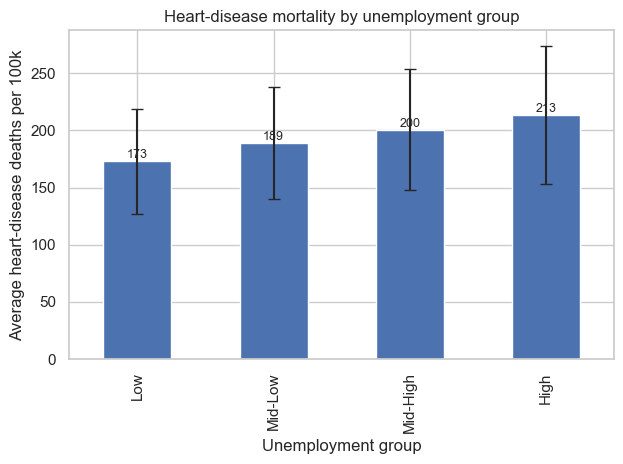

In [ ]:

# 1. Summarize by group
summary = (
    df_reg
    .groupby('unemployment_group', observed=True)['heart_mortality_rate']
    .agg(['mean', 'std', 'count'])
)

# (Optional) enforce logical order if it's categorical
order = ['Low', 'Mid-Low', 'Mid-High', 'High']
summary = summary.reindex(order)

# 2. Plot bar chart with error bars
ax = summary['mean'].plot(
    kind='bar',
    yerr=summary['std'],   # use std as error bar
    capsize=4
)

# 3. Labels & title
ax.set_xlabel('Unemployment group')
ax.set_ylabel('Average heart-disease deaths per 100k')
ax.set_title('Heart-disease mortality by unemployment group')

# 4. Show exact values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

When unemployment is divided into four equal-sized groups (Low → High), the average heart-disease mortality increases steadily:
* Low unemployment counties: 173 deaths per 100k
* High unemployment counties: 213 deaths per 100k



Unemployment rate trend analysis (year-over-year averages)

Text(0, 0.5, 'Mortality Rate (per 100k)')

Text(0, 0.5, 'unemployment rate')

([<matplotlib.axis.XTick at 0x30de45310>,
 [Text(2012, 0, '2012'),
  Text(2014, 0, '2014'),
  Text(2016, 0, '2016'),
  Text(2018, 0, '2018')])

Text(0.5, 1.0, 'Average unemployment rate vs Heart-Disease Mortality (2012–2018)')

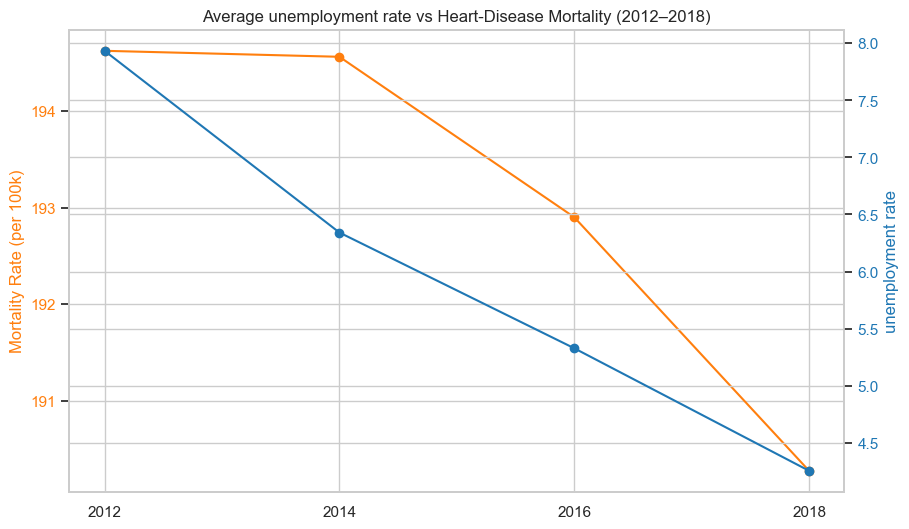

In [ ]:
# 1. Aggregate to get one value per year
yearly = (
    df_merged
    .groupby('year')[['heart_mortality_rate', 'unemployment_rate']]
    .mean()
)

# 2. Plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()

# Heart-disease mortality (orange, left axis)
ax1.plot(yearly.index, yearly['heart_mortality_rate'],
         marker='o', color='tab:orange')
ax1.set_ylabel('Mortality Rate (per 100k)', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

# Unemployment rate (blue, right axis)
ax2.plot(yearly.index, yearly['unemployment_rate'],
         marker='o', color='tab:blue')
ax2.set_ylabel('unemployment rate', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.xticks([2012, 2014, 2016, 2018])
plt.title('Average unemployment rate vs Heart-Disease Mortality (2012–2018)')
plt.show()

From the above graph:
*   Unemployment drops sharply from 8.0% → 4.3%, Mortality drops from 195 to 190 deaths per 100k
*   This may initially suggest a mild positive association: counties experience slightly better heart-health outcomes when unemployment decreases


<Figure size 1200x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='unemployment_rate', ylabel='heart_mortality_rate'>

Text(0.5, 1.0, 'Unemployment vs Mortality (2012)')

Text(0.5, 0, 'Unemployment Rate (%)')

Text(0, 0.5, 'Heart Disease Mortality (per 100k)')

<Axes: >

<Axes: xlabel='unemployment_rate', ylabel='heart_mortality_rate'>

Text(0.5, 1.0, 'Unemployment vs Mortality (2014)')

Text(0.5, 0, 'Unemployment Rate (%)')

Text(0, 0.5, 'Heart Disease Mortality (per 100k)')

<Axes: >

<Axes: xlabel='unemployment_rate', ylabel='heart_mortality_rate'>

Text(0.5, 1.0, 'Unemployment vs Mortality (2016)')

Text(0.5, 0, 'Unemployment Rate (%)')

Text(0, 0.5, 'Heart Disease Mortality (per 100k)')

<Axes: >

<Axes: xlabel='unemployment_rate', ylabel='heart_mortality_rate'>

Text(0.5, 1.0, 'Unemployment vs Mortality (2018)')

Text(0.5, 0, 'Unemployment Rate (%)')

Text(0, 0.5, 'Heart Disease Mortality (per 100k)')

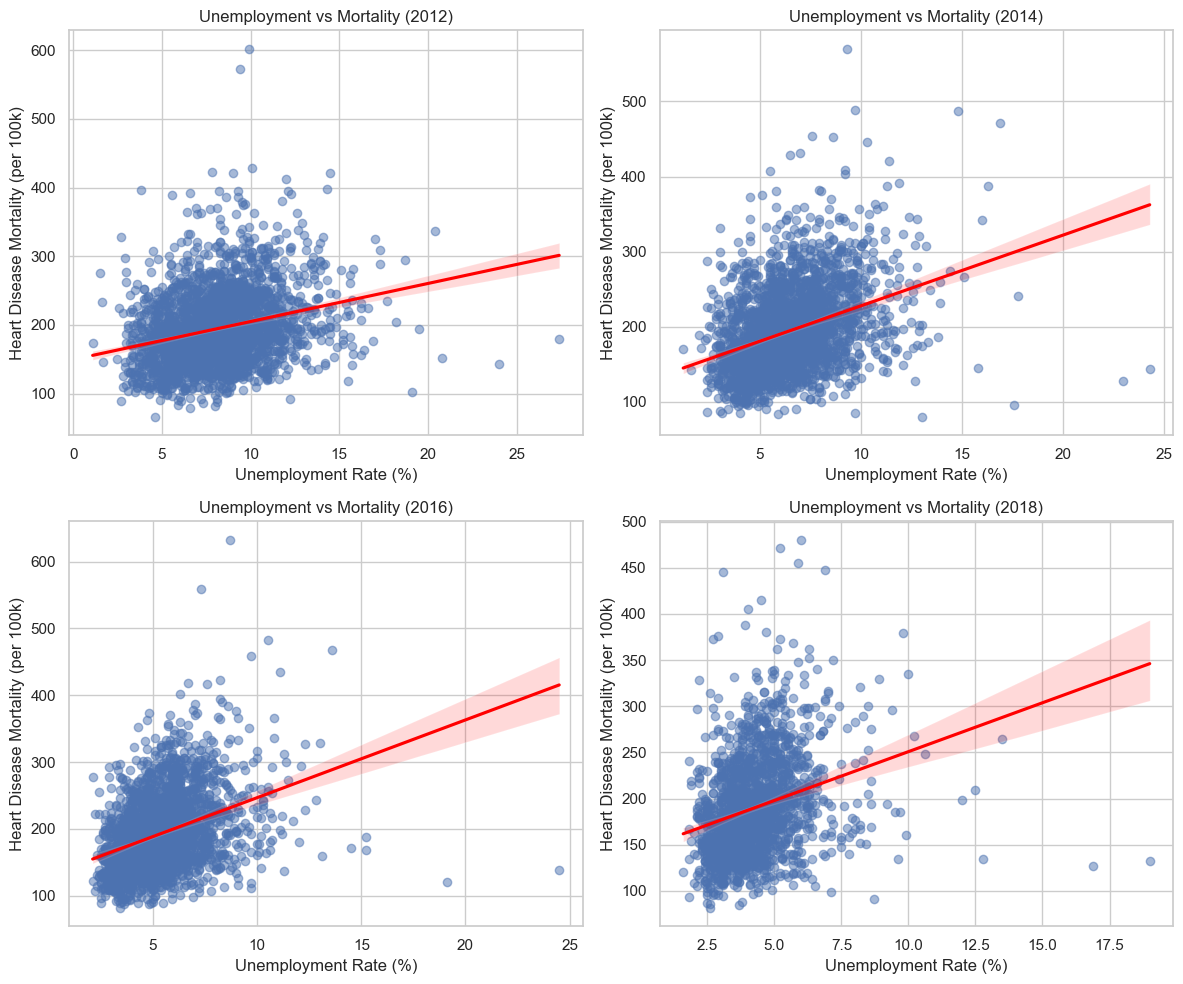

In [ ]:
years = sorted(df_merged['year'].unique())

plt.figure(figsize=(12, 10))

for i, yr in enumerate(years, 1):
    plt.subplot(2, 2, i)
    temp = df_merged[df_merged['year'] == yr]

    sns.regplot(
        data=temp,
        x='unemployment_rate',
        y='heart_mortality_rate',
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red'}
    )

    plt.title(f'Unemployment vs Mortality ({yr})')
    plt.xlabel('Unemployment Rate (%)')
    plt.ylabel('Heart Disease Mortality (per 100k)')

plt.tight_layout()
plt.show()

When we look for the county-level at each different four years:

* we still observes a consistent positive association between unemployment and heart-disease mortality

* However, this relationship was not as strong as we initially expected.

* Therefore, we conclude that unemployment is one of multiple factors influencing heart-disease outcomes, rather than a dominant predictor.

GDP Growth Rate

In [ ]:
## Same analytical steps/method as the 'unemployment rate'

df_reg['gdp_group'] = pd.qcut(
    df_reg['gdp_growth'], q=4,
    labels=['Low', 'Mid-Low', 'Mid-High', 'High']
)
df_reg.groupby('gdp_group')['heart_mortality_rate'].mean()

/var/folders/qb/8b4gxqr95nz7jpzxtmfjfnfh0000gn/T/ipykernel_20674/736820023.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_reg.groupby('gdp_group')['heart_mortality_rate'].mean()


gdp_group
Low         205.765783
Mid-Low     193.578777
Mid-High    183.403300
High        190.800218
Name: heart_mortality_rate, dtype: float64

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'GDP Growth Group')

Text(0, 0.5, 'Average Heart-Disease Mortality (per 100k)')

Text(0.5, 1.0, 'Mortality Rate by GDP Growth Group')

Text(0.0, 205.76578282828282, '206')

Text(1.0, 193.5787765293383, '194')

Text(2.0, 183.40330047149592, '183')

Text(3.0, 190.80021834061137, '191')

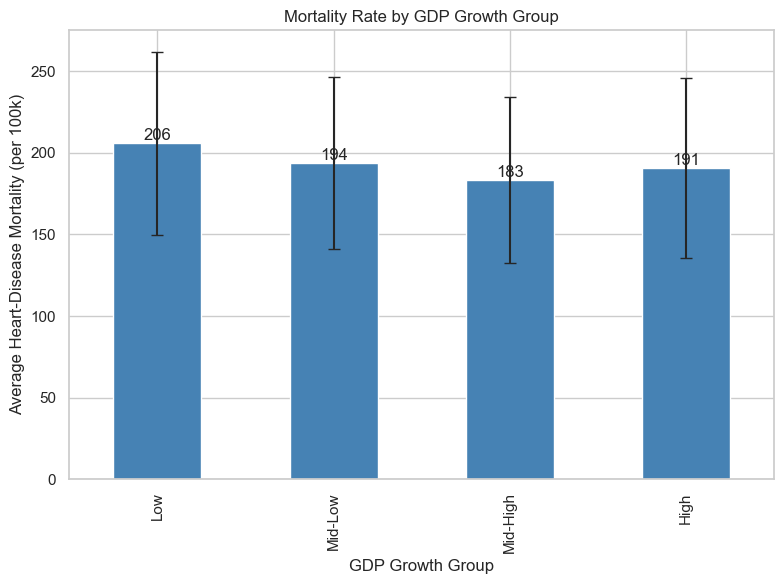

In [ ]:
# Summary table
summary = (
    df_reg.groupby('gdp_group', observed=True)['heart_mortality_rate']
    .agg(['mean', 'std', 'count'])
)

# Ensure order
order = ['Low', 'Mid-Low', 'Mid-High', 'High']
summary = summary.reindex(order)

# Plot
plt.figure(figsize=(8,6))
ax = summary['mean'].plot(
    kind='bar',
    yerr=summary['std'],
    capsize=4,
    color='steelblue'
)

# Labels
ax.set_xlabel('GDP Growth Group')
ax.set_ylabel('Average Heart-Disease Mortality (per 100k)')
ax.set_title('Mortality Rate by GDP Growth Group')

# Add values on bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

County-level GDP growth does not show a strong or consistent relationship with heart disease mortality.

Unlike unemployment (which showed clear rising mortality with higher unemployment), GDP growth quartiles display very similar distribution patterns, suggesting GDP growth is a weaker predictor of cardiovascular mortality at the county level.

Text(0, 0.5, 'Mortality Rate (per 100k)')

([<matplotlib.axis.XTick at 0x30a003d90>,
 [Text(2012, 0, '2012'),
  Text(2014, 0, '2014'),
  Text(2016, 0, '2016'),
  Text(2018, 0, '2018')])

Text(0, 0.5, 'Average GDP Growth (%)')

([<matplotlib.axis.XTick at 0x30a003d90>,
 [Text(2012, 0, '2012'),
  Text(2014, 0, '2014'),
  Text(2016, 0, '2016'),
  Text(2018, 0, '2018')])

Text(0.5, 1.0, 'Average GDP Growth rate vs Heart-Disease Mortality (2012–2018)')

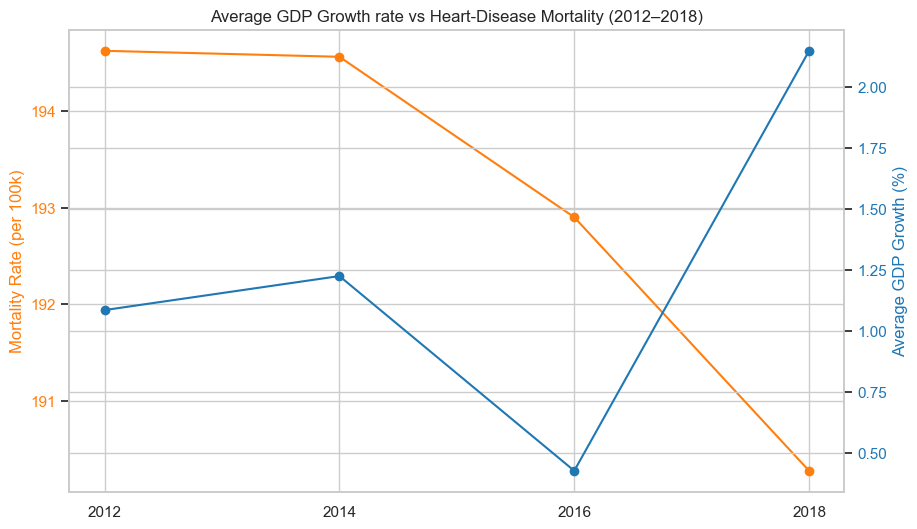

In [ ]:
yearly1 = (
    df_merged
    .groupby('year')[['heart_mortality_rate', 'gdp_growth']]
    .mean()
)

fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()

# Mortality (orange)
ax1.plot(yearly1.index, yearly1['heart_mortality_rate'], marker='o', color='tab:orange')
ax1.set_ylabel('Mortality Rate (per 100k)', color='tab:orange')
plt.xticks([2012, 2014, 2016, 2018])
ax1.tick_params(axis='y', labelcolor='tab:orange')

# GDP growth (blue)
ax2.plot(yearly1.index, yearly1['gdp_growth'], marker='o', color='tab:blue')
ax2.set_ylabel('Average GDP Growth (%)', color='tab:blue')
plt.xticks([2012, 2014, 2016, 2018])
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Average GDP Growth rate vs Heart-Disease Mortality (2012–2018)')
plt.show()

Heart-disease mortality gradually declines from 2012 → 2018.
GDP growth, however, fluctuates irregularly and does not follow the same direction as mortality.

We conclude that the GDP  growth showed the weakest association with heart-disease mortality


<Figure size 1200x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='gdp_growth', ylabel='heart_mortality_rate'>

Text(0.5, 1.0, 'GDP growth rate vs Mortality (2012)')

Text(0.5, 0, 'GDP growth rate(%)')

Text(0, 0.5, 'Heart Disease Mortality (per 100k)')

<Axes: >

<Axes: xlabel='gdp_growth', ylabel='heart_mortality_rate'>

Text(0.5, 1.0, 'GDP growth rate vs Mortality (2014)')

Text(0.5, 0, 'GDP growth rate(%)')

Text(0, 0.5, 'Heart Disease Mortality (per 100k)')

<Axes: >

<Axes: xlabel='gdp_growth', ylabel='heart_mortality_rate'>

Text(0.5, 1.0, 'GDP growth rate vs Mortality (2016)')

Text(0.5, 0, 'GDP growth rate(%)')

Text(0, 0.5, 'Heart Disease Mortality (per 100k)')

<Axes: >

<Axes: xlabel='gdp_growth', ylabel='heart_mortality_rate'>

Text(0.5, 1.0, 'GDP growth rate vs Mortality (2018)')

Text(0.5, 0, 'GDP growth rate(%)')

Text(0, 0.5, 'Heart Disease Mortality (per 100k)')

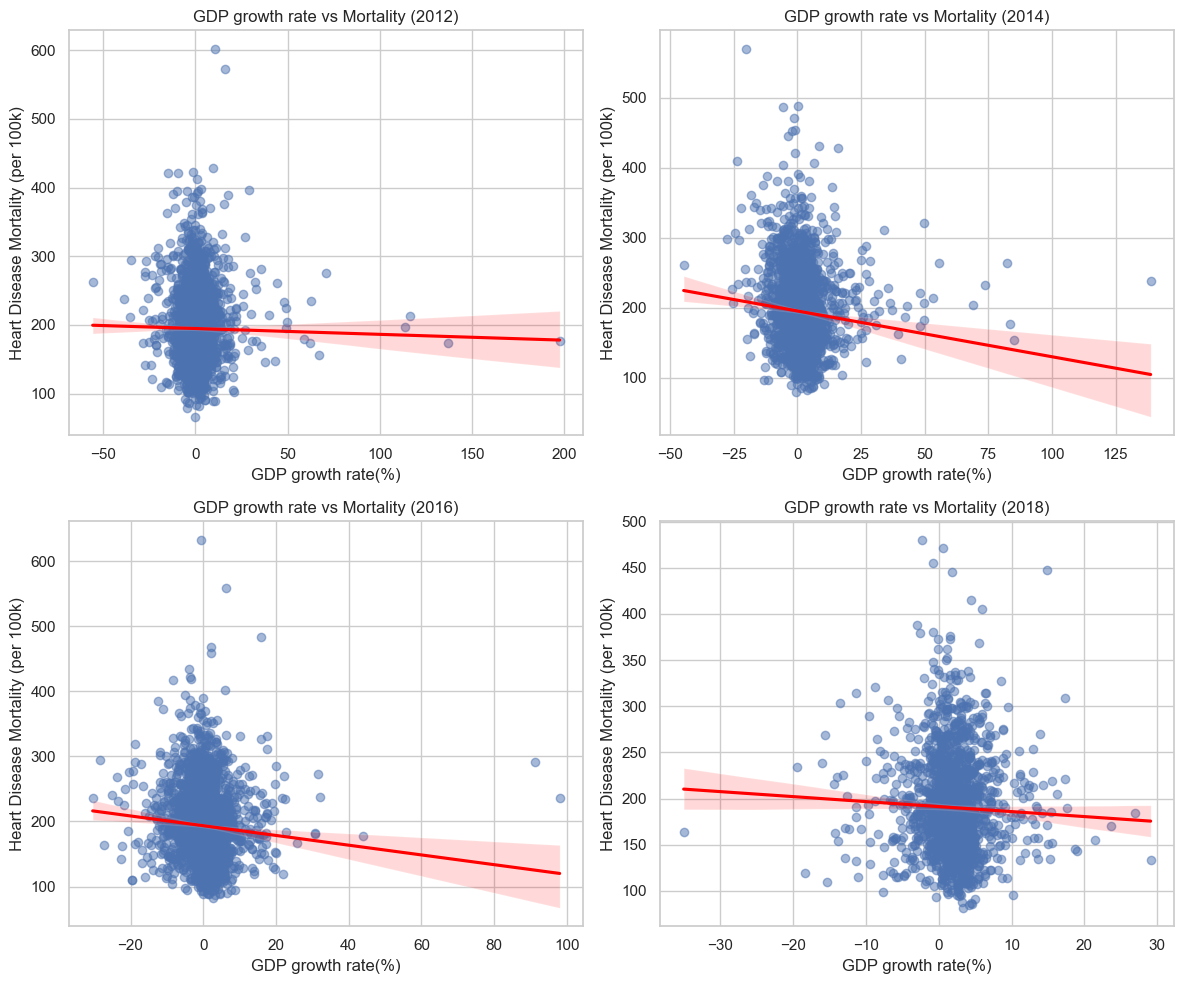

In [ ]:
plt.figure(figsize=(12, 10))

for i, yr in enumerate(years, 1):
    plt.subplot(2, 2, i)
    temp = df_merged[df_merged['year'] == yr]

    sns.regplot(
        data=temp,
        x='gdp_growth',
        y='heart_mortality_rate',
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red'}
    )

    plt.title(f'GDP growth rate vs Mortality ({yr})')
    plt.xlabel('GDP growth rate(%)')
    plt.ylabel('Heart Disease Mortality (per 100k)')

plt.tight_layout()
plt.show()

For each county-level GDP growth rate at different years:

* Higher GDP growth may be associated with slightly lower heart-disease mortality. e.g. rich counties may experience better health outcomes due to greater investment in healthcare and public service.
* However, this relationship was extremely week (much weaker than unemployment rate)
* We conclude that GDP growth explains very little of the variation in mortality.

Uninsured coverage rate

In [ ]:
df_reg['uninsured_group'] = pd.qcut(
    df_reg['uninsured_average_by_county'], q=4,
    labels=['Low', 'Mid-Low', 'Mid-High', 'High']
)
df_reg = df_reg.dropna(subset=['uninsured_average_by_county'])
df_reg.groupby('uninsured_group')['heart_mortality_rate'].mean()


/var/folders/qb/8b4gxqr95nz7jpzxtmfjfnfh0000gn/T/ipykernel_20674/984591011.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_reg.groupby('uninsured_group')['heart_mortality_rate'].mean()


uninsured_group
Low         181.966553
Mid-Low     189.797019
Mid-High    203.020426
High        199.052744
Name: heart_mortality_rate, dtype: float64

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Uninsured Rate Group')

Text(0, 0.5, 'Average Heart-Disease Mortality (per 100k)')

Text(0.5, 1.0, 'Mortality Rate by Uninsured Coverage Level')

Text(0.0, 181.96655333616658, '182')

Text(1.0, 189.79701873935264, '190')

Text(2.0, 203.0204255319149, '203')

Text(3.0, 199.05274351339855, '199')

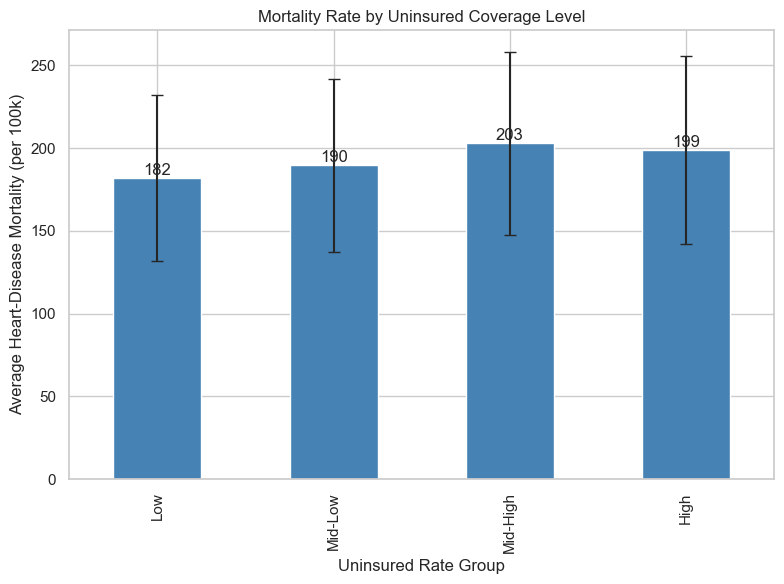

In [ ]:
# Summaries for uninsured groups
summary = (
    df_reg.groupby('uninsured_group', observed=True)['heart_mortality_rate']
    .agg(['mean', 'std', 'count'])
)

# Ensure proper order
order = ['Low', 'Mid-Low', 'Mid-High', 'High']
summary = summary.reindex(order)

plt.figure(figsize=(8,6))
ax = summary['mean'].plot(
    kind='bar',
    yerr=summary['std'],
    capsize=4,
    color='steelblue'
)

# Axis labels and title
ax.set_xlabel('Uninsured Rate Group')
ax.set_ylabel('Average Heart-Disease Mortality (per 100k)')
ax.set_title('Mortality Rate by Uninsured Coverage Level')

# Add mean labels on bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

The uninsured rate shows a modest association with heart-disease mortality:

Mortality increases from about 182 deaths in low-uninsured counties to over 203 in mid-high uninsured counties
Mortality decreases into 199 deaths per 100k in high uninsured counties.

Text(0, 0.5, 'Mortality Rate (per 100k)')

([<matplotlib.axis.XTick at 0x314b18910>,
 [Text(2012, 0, '2012'),
  Text(2014, 0, '2014'),
  Text(2016, 0, '2016'),
  Text(2018, 0, '2018')])

Text(0, 0.5, 'uninsured average rate')

([<matplotlib.axis.XTick at 0x314b18910>,
 [Text(2012, 0, '2012'),
  Text(2014, 0, '2014'),
  Text(2016, 0, '2016'),
  Text(2018, 0, '2018')])

Text(0.5, 1.0, 'Average uninsured average rate vs Heart-Disease Mortality (2012–2018)')

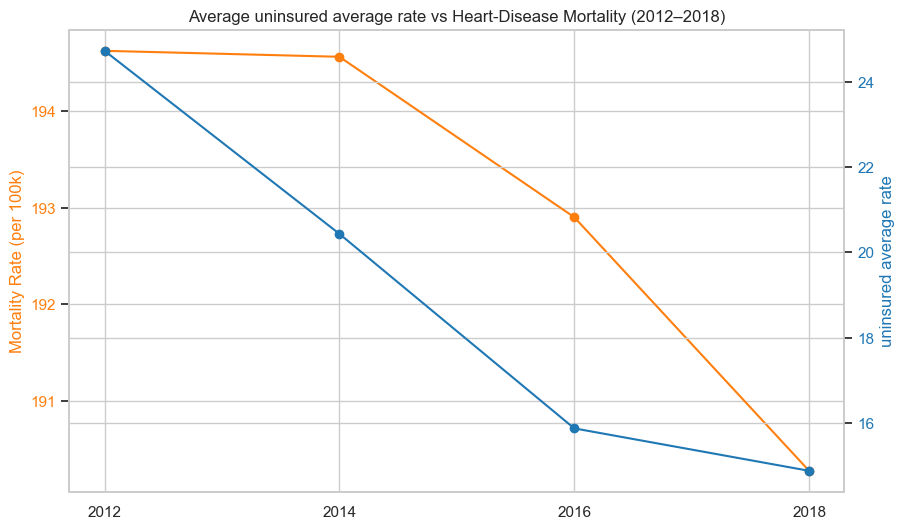

In [ ]:
yearly2 = (
    df_merged
    .groupby('year')[['heart_mortality_rate', 'uninsured_average_by_county']]
    .mean()
)
fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()

# Mortality (orange)
ax1.plot(yearly2.index, yearly2['heart_mortality_rate'], marker='o', color='tab:orange')
ax1.set_ylabel('Mortality Rate (per 100k)', color='tab:orange')
plt.xticks([2012, 2014, 2016, 2018])
ax1.tick_params(axis='y', labelcolor='tab:orange')

# uninsured_average_by_county rate (blue)
ax2.plot(yearly2.index, yearly2['uninsured_average_by_county'], marker='o', color='tab:blue')
ax2.set_ylabel('uninsured average rate', color='tab:blue')
plt.xticks([2012, 2014, 2016, 2018])
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Average uninsured average rate vs Heart-Disease Mortality (2012–2018)')
plt.show()

 Lower uninsured rates may contribute to better health outcomes, but the effect is modest
*  Both the uninsured rate and heart-disease mortality steadily decline from 2012 to 2018.
*  Uninsured rates fall sharply while mortality drops only slightly




<Figure size 1200x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='uninsured_average_by_county', ylabel='heart_mortality_rate'>

Text(0.5, 1.0, 'uninsured_average_by_county vs Mortality (2012)')

Text(0.5, 0, 'uninsured rate(%)')

Text(0, 0.5, 'Heart Disease Mortality (per 100k)')

<Axes: >

<Axes: xlabel='uninsured_average_by_county', ylabel='heart_mortality_rate'>

Text(0.5, 1.0, 'uninsured_average_by_county vs Mortality (2014)')

Text(0.5, 0, 'uninsured rate(%)')

Text(0, 0.5, 'Heart Disease Mortality (per 100k)')

<Axes: >

<Axes: xlabel='uninsured_average_by_county', ylabel='heart_mortality_rate'>

Text(0.5, 1.0, 'uninsured_average_by_county vs Mortality (2016)')

Text(0.5, 0, 'uninsured rate(%)')

Text(0, 0.5, 'Heart Disease Mortality (per 100k)')

<Axes: >

<Axes: xlabel='uninsured_average_by_county', ylabel='heart_mortality_rate'>

Text(0.5, 1.0, 'uninsured_average_by_county vs Mortality (2018)')

Text(0.5, 0, 'uninsured rate(%)')

Text(0, 0.5, 'Heart Disease Mortality (per 100k)')

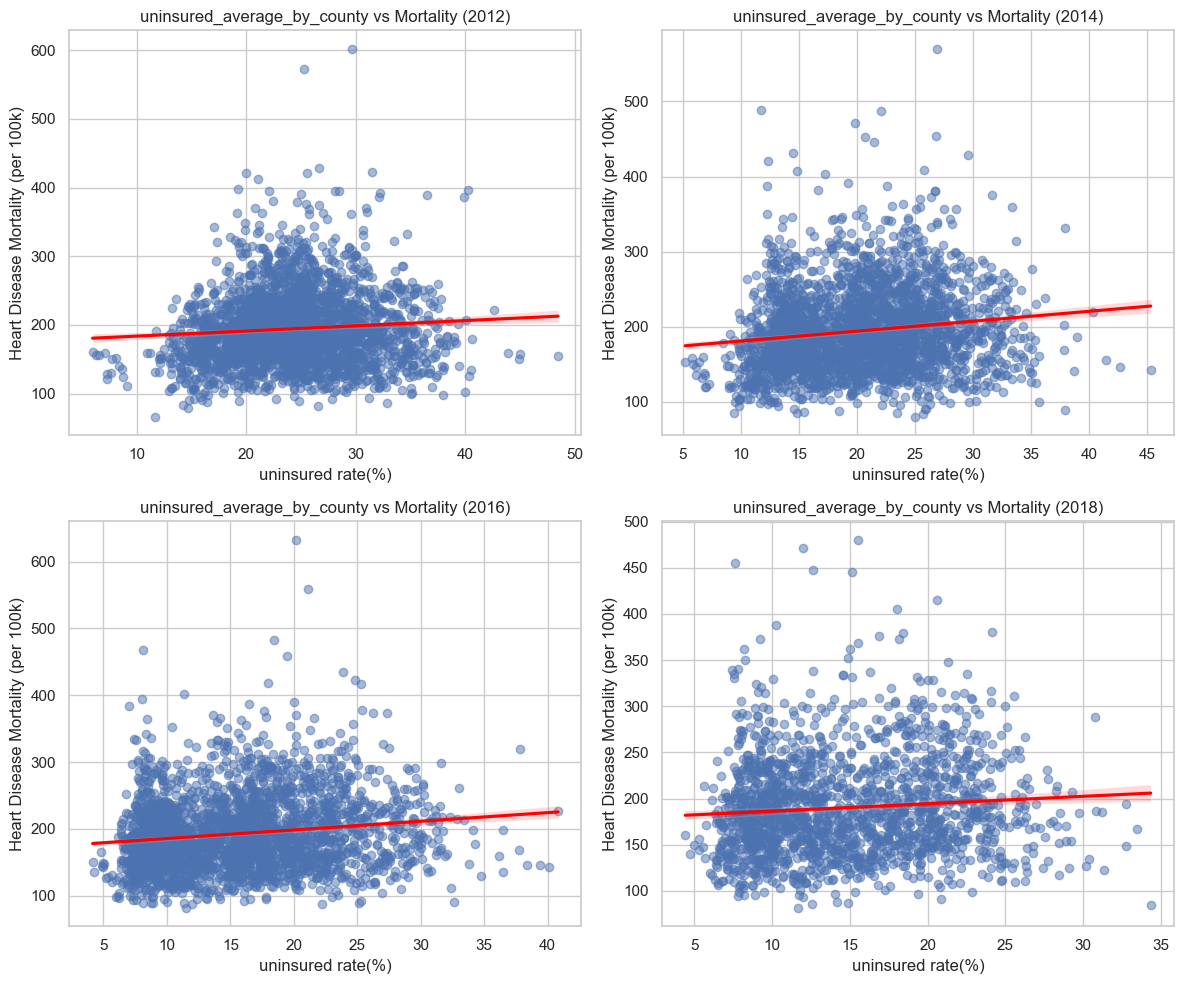

In [ ]:
plt.figure(figsize=(12, 10))

for i, yr in enumerate(years, 1):
    plt.subplot(2, 2, i)
    temp = df_merged[df_merged['year'] == yr]

    sns.regplot(
        data=temp,
        x='uninsured_average_by_county',
        y='heart_mortality_rate',
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red'}
    )

    plt.title(f'uninsured_average_by_county vs Mortality ({yr})')
    plt.xlabel('uninsured rate(%)')
    plt.ylabel('Heart Disease Mortality (per 100k)')

plt.tight_layout()
plt.show()

From the above scatterplot, we observed:
* Counties with higher uninsured rates tend to have slightly higher heart-disease mortality
* This relationship is still considered as week, but it has a clearer (though still modest) pattern than GDP.

Our conclusion for the uninsured rate is that while lack of insurance may contribute to poorer health outcomes, it is only one of several factors influencing county-level mortality.



We acknowldege exceptions/outliers

In [ ]:
df_merged.nlargest(5, 'heart_mortality_rate')[[
  'County', 'year', 'heart_mortality_rate', 'year',
    'unemployment_rate', 'gdp_growth', 'uninsured_average_by_county',
]]

,County,year,heart_mortality_rate,year,unemployment_rate,gdp_growth,uninsured_average_by_county
6363,"Franklin Parish, LA",2016,632.7,2016,8.7,-0.7,20.161458
6361,"Franklin Parish, LA",2012,601.9,2012,9.9,10.7,29.644872
5753,"Gallatin County, KY",2012,572.0,2012,9.4,16.1,25.280769
6362,"Franklin Parish, LA",2014,570.0,2014,9.3,-20.2,26.887500
2293,"Clinch County, GA",2016,558.8,2016,7.3,6.3,21.129167


In [ ]:
df_merged.nsmallest(5, 'heart_mortality_rate')[[
  'County', 'heart_mortality_rate', 'year',
    'unemployment_rate', 'gdp_growth', 'uninsured_average_by_county'
]]

,County,heart_mortality_rate,year,unemployment_rate,gdp_growth,uninsured_average_by_county
7742,"Nicollet County, MN",66.3,2012,4.6,-0.2,11.676923
7513,"Chisago County, MN",79.3,2012,6.6,-4.6,14.700000
552,"Santa Cruz County, AZ",80.2,2014,13.0,-0.3,25.031250
1438,"Douglas County, CO",81.8,2018,2.6,3.4,11.693750
17132,"Lafayette County, WI",81.9,2016,3.4,2.8,11.515625


From the sample counties
* The unemployment rate in general was higher than those counties with less mortality rate.
* Counties with higher heart-disease mortality rate tend to have higher uninsured percentage of population.
* local GDP growth rate is weakly associated with the heart-disease mortality rate



# H2 Median Household Income and Heart Disease Mortality rate (Kenny)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_mortality = pd.read_csv('HeartDiseaseStateMortality.csv')
df_incometo2023 = pd.read_csv('mediancincome2017to2023.csv')

In [ ]:
df_mortality.head()
#Heart disease deaths per 100,000 total population (age-adjusted mortality rate)

,YEAR,STATE,RATE,DEATHS,URL
0,2023,AL,227.3,14587,/nchs/pressroom/states/alabama/al.htm
1,2023,AK,133.0,918,/nchs/pressroom/states/alaska/ak.htm
2,2023,AZ,145.3,14641,/nchs/pressroom/states/arizona/az.htm
3,2023,AR,218.8,8443,/nchs/pressroom/states/arkansas/ar.htm
4,2023,CA,138.1,64173,/nchs/pressroom/states/california/ca.htm


In [ ]:
us_state_to_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "District of Columbia": "DC",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY",
    "Puerto Rico": "PR"}

In [ ]:
df_incometo2023.head()

,State,2017,2018,2019,2020,2021,2022,2023,Percent Change\n2022-2023,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,"$62,250","$59,900","$66,430","$63,980","$63,750","$62,290","$60,660",-2.6,NaN
2,Alaska,"95,440","82,450","92,670","87,440","90,850","93,310","98,190",5.2,NaN
3,Arizona,"73,060","74,710","83,540","78,480","79,310","76,370","82,660",8.2,NaN
4,Arkansas,"60,880","59,720","64,470","59,400","56,870","56,120","63,250",12.7,NaN


## Heart Disease Mortality vs. Median Income by State_2020

In [ ]:
df_incometo2023 = df_incometo2023.dropna(subset=['State']).iloc[1:].copy()

### Data Cleaning

In [ ]:
df_income_2020 = df_incometo2023[['State', '2020']].copy()
df_income_2020['Median_Income_2020'] = (
    df_income_2020['2020']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)

In [ ]:
df_income_2020['State_Abbr'] = df_income_2020['State'].map(us_state_to_abbrev)
df_income_2020 = df_income_2020[['State_Abbr', 'Median_Income_2020']].dropna()

In [ ]:
df_mortality_2020 = df_mortality[df_mortality['YEAR'] == 2020].copy()
df_mortality_2020 = df_mortality_2020.rename(columns={'STATE': 'State_Abbr', 'RATE': 'Mortality_Rate_2020'})
df_mortality_2020 = df_mortality_2020[['State_Abbr', 'Mortality_Rate_2020']]

In [ ]:
df_merged_2020 = pd.merge(df_income_2020, df_mortality_2020, on='State_Abbr', how='inner')

In [ ]:
df_merged_2020.head()

,State_Abbr,Median_Income_2020,Mortality_Rate_2020
0,AK,87440.0,139.8
1,AZ,78480.0,144.8
2,AR,59400.0,222.5
3,CA,90840.0,144.0
4,CO,98010.0,128.1


### Correlation (2020)

In [ ]:
correlation_2020 = df_merged_2020['Median_Income_2020'].corr(df_merged_2020['Mortality_Rate_2020'])
correlation_2020

np.float64(-0.6868663328714114)

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Median_Income_2020', ylabel='Mortality_Rate_2020'>

Text(5, 5, 'AK')

Text(5, 5, 'AZ')

Text(5, 5, 'AR')

Text(5, 5, 'CA')

Text(5, 5, 'CO')

Text(5, 5, 'CT')

Text(5, 5, 'DE')

Text(5, 5, 'FL')

Text(5, 5, 'GA')

Text(5, 5, 'HI')

Text(5, 5, 'ID')

Text(5, 5, 'IL')

Text(5, 5, 'IN')

Text(5, 5, 'IA')

Text(5, 5, 'KS')

Text(5, 5, 'KY')

Text(5, 5, 'LA')

Text(5, 5, 'ME')

Text(5, 5, 'MD')

Text(5, 5, 'MA')

Text(5, 5, 'MI')

Text(5, 5, 'MN')

Text(5, 5, 'MS')

Text(5, 5, 'MO')

Text(5, 5, 'MT')

Text(5, 5, 'NE')

Text(5, 5, 'NV')

Text(5, 5, 'NH')

Text(5, 5, 'NJ')

Text(5, 5, 'NM')

Text(5, 5, 'NY')

Text(5, 5, 'NC')

Text(5, 5, 'ND')

Text(5, 5, 'OH')

Text(5, 5, 'OK')

Text(5, 5, 'OR')

Text(5, 5, 'PA')

Text(5, 5, 'RI')

Text(5, 5, 'SC')

Text(5, 5, 'SD')

Text(5, 5, 'TN')

Text(5, 5, 'TX')

Text(5, 5, 'UT')

Text(5, 5, 'VT')

Text(5, 5, 'VA')

Text(5, 5, 'WA')

Text(5, 5, 'WV')

Text(5, 5, 'WI')

Text(5, 5, 'WY')

Text(0.5, 1.0, 'Heart Disease Mortality vs. Median Income by State (2020)')

Text(0.5, 0, 'Median Household Income ($)')

Text(0, 0.5, 'Heart Disease Mortality Rate')

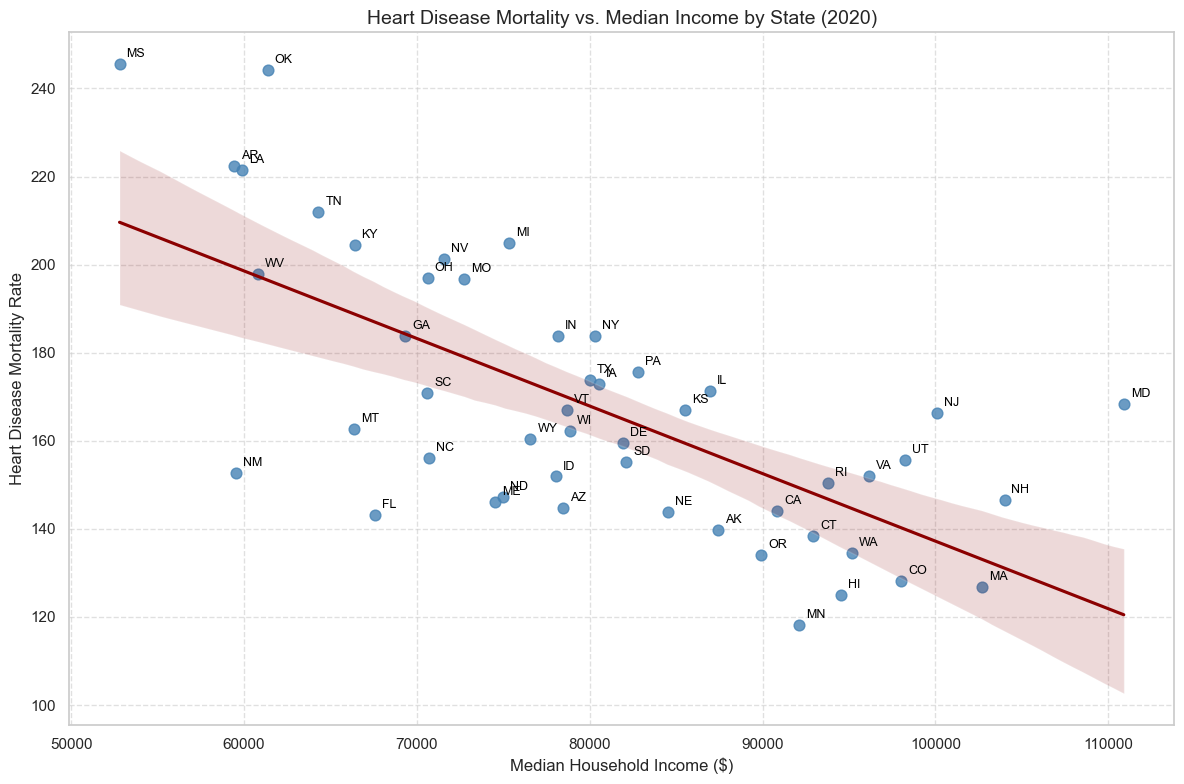

In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(
    x='Median_Income_2020',
    y='Mortality_Rate_2020',
    data=df_merged_2020,
    scatter_kws={'s': 60, 'color': 'steelblue'},
    line_kws={"color": "darkred"}
)
for i in range(len(df_merged_2020)):
    plt.annotate(
        text=df_merged_2020['State_Abbr'].iloc[i],
        xy=(df_merged_2020['Median_Income_2020'].iloc[i], df_merged_2020['Mortality_Rate_2020'].iloc[i]),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        color='black'
)
plt.title('Heart Disease Mortality vs. Median Income by State (2020)', fontsize=14)
plt.xlabel('Median Household Income ($)', fontsize=12)
plt.ylabel('Heart Disease Mortality Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Heart Disease Mortality vs. Median Income by State_2018

In [ ]:
df_incometo2023 = df_incometo2023.dropna(subset=['State']).iloc[1:].copy()

### Data Cleaning

In [ ]:
df_income_2018 = df_incometo2023[['State', '2018']].copy()
df_income_2018['Median_Income_2018'] = (
    df_income_2018['2018']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)

In [ ]:
df_income_2018['State_Abbr'] = df_income_2018['State'].map(us_state_to_abbrev)
df_income_2018 = df_income_2018[['State_Abbr', 'Median_Income_2018']].dropna()

In [ ]:
df_mortality_2018 = df_mortality[df_mortality['YEAR'] == 2018].copy()
df_mortality_2018 = df_mortality_2018.rename(columns={'STATE': 'State_Abbr', 'RATE': 'Mortality_Rate_2018'})
df_mortality_2018 = df_mortality_2018[['State_Abbr', 'Mortality_Rate_2018']]

In [ ]:
df_merged_2018 = pd.merge(df_income_2018, df_mortality_2018, on='State_Abbr', how='inner')

In [ ]:
df_merged_2018.head()

,State_Abbr,Median_Income_2018,Mortality_Rate_2018
0,AZ,74710.0,136.4
1,AR,59720.0,217.4
2,CA,84560.0,139.7
3,CO,87610.0,124.3
4,CT,87340.0,142.1


### Correlation (2018)

In [ ]:
correlation_2018 = df_merged_2018['Median_Income_2018'].corr(df_merged_2018['Mortality_Rate_2018'])
correlation_2018

np.float64(-0.6404278149139855)

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Median_Income_2018', ylabel='Mortality_Rate_2018'>

Text(5, 5, 'AZ')

Text(5, 5, 'AR')

Text(5, 5, 'CA')

Text(5, 5, 'CO')

Text(5, 5, 'CT')

Text(5, 5, 'DE')

Text(5, 5, 'FL')

Text(5, 5, 'GA')

Text(5, 5, 'HI')

Text(5, 5, 'ID')

Text(5, 5, 'IL')

Text(5, 5, 'IN')

Text(5, 5, 'IA')

Text(5, 5, 'KS')

Text(5, 5, 'KY')

Text(5, 5, 'LA')

Text(5, 5, 'ME')

Text(5, 5, 'MD')

Text(5, 5, 'MA')

Text(5, 5, 'MI')

Text(5, 5, 'MN')

Text(5, 5, 'MS')

Text(5, 5, 'MO')

Text(5, 5, 'MT')

Text(5, 5, 'NE')

Text(5, 5, 'NV')

Text(5, 5, 'NH')

Text(5, 5, 'NJ')

Text(5, 5, 'NM')

Text(5, 5, 'NY')

Text(5, 5, 'NC')

Text(5, 5, 'ND')

Text(5, 5, 'OH')

Text(5, 5, 'OK')

Text(5, 5, 'OR')

Text(5, 5, 'PA')

Text(5, 5, 'RI')

Text(5, 5, 'SC')

Text(5, 5, 'SD')

Text(5, 5, 'TN')

Text(5, 5, 'TX')

Text(5, 5, 'UT')

Text(5, 5, 'VT')

Text(5, 5, 'VA')

Text(5, 5, 'WA')

Text(5, 5, 'WV')

Text(5, 5, 'WI')

Text(5, 5, 'WY')

Text(0.5, 1.0, 'Heart Disease Mortality vs. Median Income by State (2018)')

Text(0.5, 0, 'Median Household Income ($)')

Text(0, 0.5, 'Heart Disease Mortality Rate')

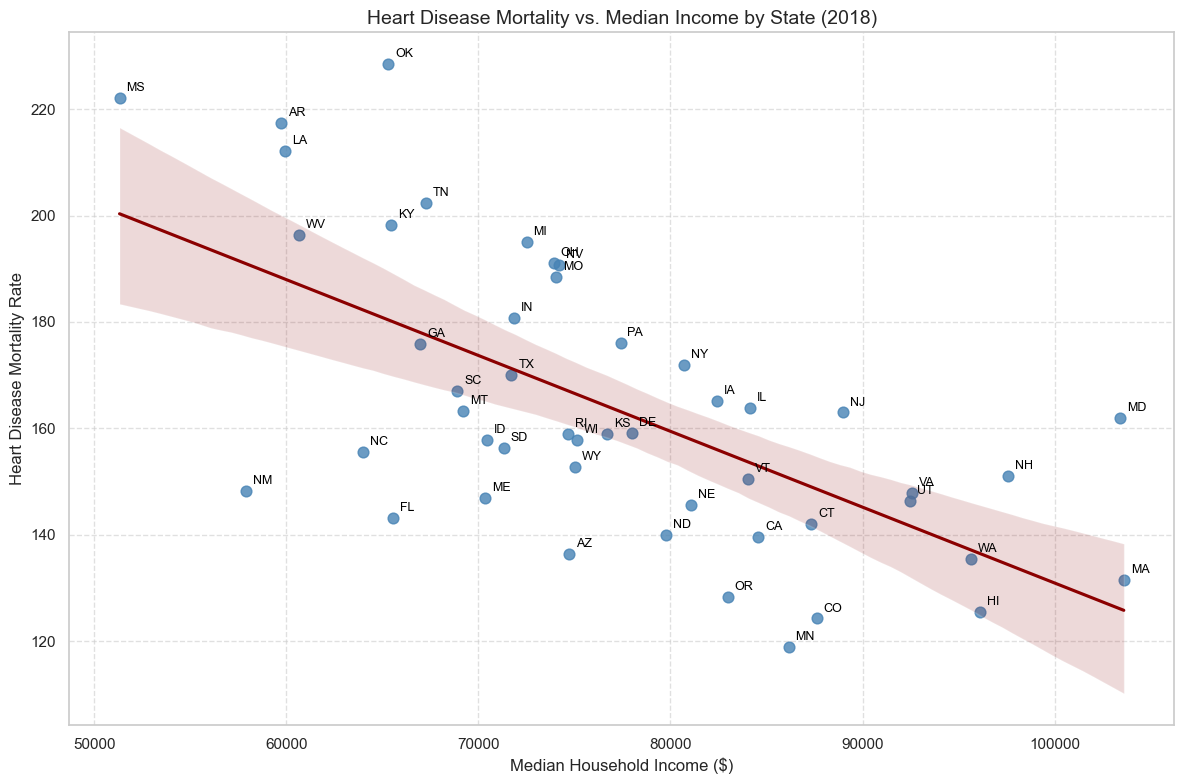

In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(
    x='Median_Income_2018',
    y='Mortality_Rate_2018',
    data=df_merged_2018,
    scatter_kws={'s': 60, 'color': 'steelblue'},
    line_kws={"color": "darkred"}
)
for i in range(len(df_merged_2018)):
    plt.annotate(
        text=df_merged_2018['State_Abbr'].iloc[i],
        xy=(df_merged_2018['Median_Income_2018'].iloc[i], df_merged_2018['Mortality_Rate_2018'].iloc[i]),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        color='black'
)
plt.title('Heart Disease Mortality vs. Median Income by State (2018)', fontsize=14)
plt.xlabel('Median Household Income ($)', fontsize=12)
plt.ylabel('Heart Disease Mortality Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Heart Disease Mortality vs. Median Income by State_2023

In [ ]:
df_incometo2023 = df_incometo2023.dropna(subset=['State']).iloc[1:].copy()

### Data Cleaning

In [ ]:
df_income_2023 = df_incometo2023[['State', '2023']].copy()
df_income_2023['Median_Income_2023'] = (
    df_income_2023['2023']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)

In [ ]:
df_income_2023['State_Abbr'] = df_income_2023['State'].map(us_state_to_abbrev)
df_income_2023 = df_income_2023[['State_Abbr', 'Median_Income_2023']].dropna()

In [ ]:
df_mortality_2023 = df_mortality[df_mortality['YEAR'] == 2023].copy()
df_mortality_2023 = df_mortality_2023.rename(columns={'STATE': 'State_Abbr', 'RATE': 'Mortality_Rate_2023'})
df_mortality_2023 = df_mortality_2023[['State_Abbr', 'Mortality_Rate_2023']]

In [ ]:
df_merged_2023 = pd.merge(df_income_2023, df_mortality_2023, on='State_Abbr', how='inner')

In [ ]:
df_merged_2023.head()

,State_Abbr,Median_Income_2023,Mortality_Rate_2023
0,AR,63250.0,218.8
1,CA,89870.0,138.1
2,CO,96640.0,126.6
3,CT,92240.0,129.7
4,DE,86340.0,158.7


### Correlation (2023)

In [ ]:
correlation_2023 = df_merged_2023['Median_Income_2023'].corr(df_merged_2023['Mortality_Rate_2023'])
correlation_2023

np.float64(-0.7334695325083316)

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Median_Income_2023', ylabel='Mortality_Rate_2023'>

Text(5, 5, 'AR')

Text(5, 5, 'CA')

Text(5, 5, 'CO')

Text(5, 5, 'CT')

Text(5, 5, 'DE')

Text(5, 5, 'FL')

Text(5, 5, 'GA')

Text(5, 5, 'HI')

Text(5, 5, 'ID')

Text(5, 5, 'IL')

Text(5, 5, 'IN')

Text(5, 5, 'IA')

Text(5, 5, 'KS')

Text(5, 5, 'KY')

Text(5, 5, 'LA')

Text(5, 5, 'ME')

Text(5, 5, 'MD')

Text(5, 5, 'MA')

Text(5, 5, 'MI')

Text(5, 5, 'MN')

Text(5, 5, 'MS')

Text(5, 5, 'MO')

Text(5, 5, 'MT')

Text(5, 5, 'NE')

Text(5, 5, 'NV')

Text(5, 5, 'NH')

Text(5, 5, 'NJ')

Text(5, 5, 'NM')

Text(5, 5, 'NY')

Text(5, 5, 'NC')

Text(5, 5, 'ND')

Text(5, 5, 'OH')

Text(5, 5, 'OK')

Text(5, 5, 'OR')

Text(5, 5, 'PA')

Text(5, 5, 'RI')

Text(5, 5, 'SC')

Text(5, 5, 'SD')

Text(5, 5, 'TN')

Text(5, 5, 'TX')

Text(5, 5, 'UT')

Text(5, 5, 'VT')

Text(5, 5, 'VA')

Text(5, 5, 'WA')

Text(5, 5, 'WV')

Text(5, 5, 'WI')

Text(5, 5, 'WY')

Text(0.5, 1.0, 'Heart Disease Mortality vs. Median Income by State (2023)')

Text(0.5, 0, 'Median Household Income ($)')

Text(0, 0.5, 'Heart Disease Mortality Rate')

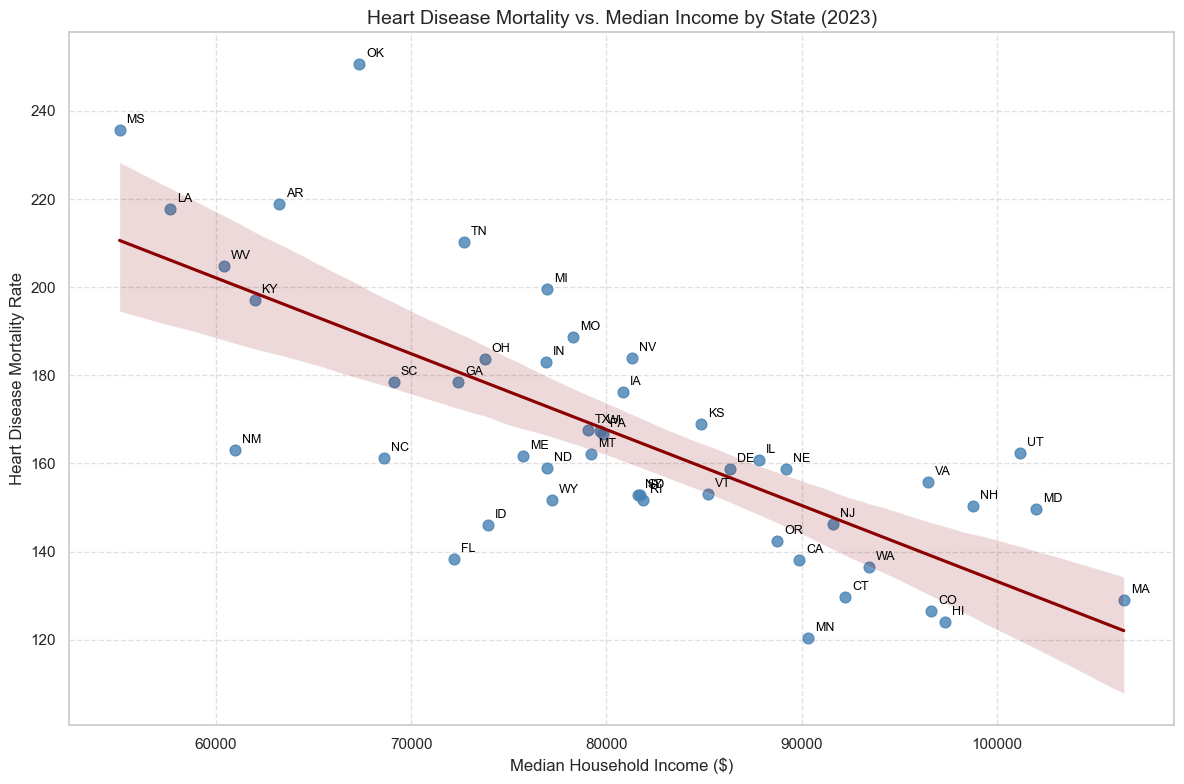

In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(
    x='Median_Income_2023',
    y='Mortality_Rate_2023',
    data=df_merged_2023,
    scatter_kws={'s': 60, 'color': 'steelblue'},
    line_kws={"color": "darkred"}
)
for i in range(len(df_merged_2023)):
    plt.annotate(
        text=df_merged_2023['State_Abbr'].iloc[i],
        xy=(df_merged_2023['Median_Income_2023'].iloc[i], df_merged_2023['Mortality_Rate_2023'].iloc[i]),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        color='black'
)
plt.title('Heart Disease Mortality vs. Median Income by State (2023)', fontsize=14)
plt.xlabel('Median Household Income ($)', fontsize=12)
plt.ylabel('Heart Disease Mortality Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Trend: Median Income vs. Heart Disease Mortality (2017-2023)

In [ ]:
df_income = pd.read_csv("mediancincome2017to2023.csv")
df_income = df_income.dropna(subset=['State']).iloc[1:].copy()

In [ ]:
income_cols = ['State', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
df_income = df_income[income_cols]
df_income_melted = df_income.melt(id_vars=['State'], var_name='Year', value_name='Median_Income')

### Data Cleaning

In [ ]:
df_income_melted['Median_Income'] = (
    df_income_melted['Median_Income']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)
df_income_melted['Year'] = df_income_melted['Year'].astype(int)

In [ ]:
annual_income = df_income_melted.groupby('Year')['Median_Income'].mean().reset_index()

In [ ]:
df_mortality = pd.read_csv("HeartDiseaseStateMortality.csv")
df_mortality = df_mortality[df_mortality['YEAR'].between(2017, 2023)]

In [ ]:
annual_mortality = df_mortality.groupby('YEAR')['RATE'].mean().reset_index()
annual_mortality.rename(columns={'YEAR': 'Year', 'RATE': 'Avg_Mortality_Rate'}, inplace=True)

In [ ]:
df_trend = pd.merge(annual_income, annual_mortality, on='Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Avg Median Household Income ($)')

Text(0, 0.5, 'Avg Heart Disease Mortality Rate (per 100k)')

Text(0.5, 1.0, 'Trend: National Median Income vs. Heart Disease Mortality (2017-2023)')

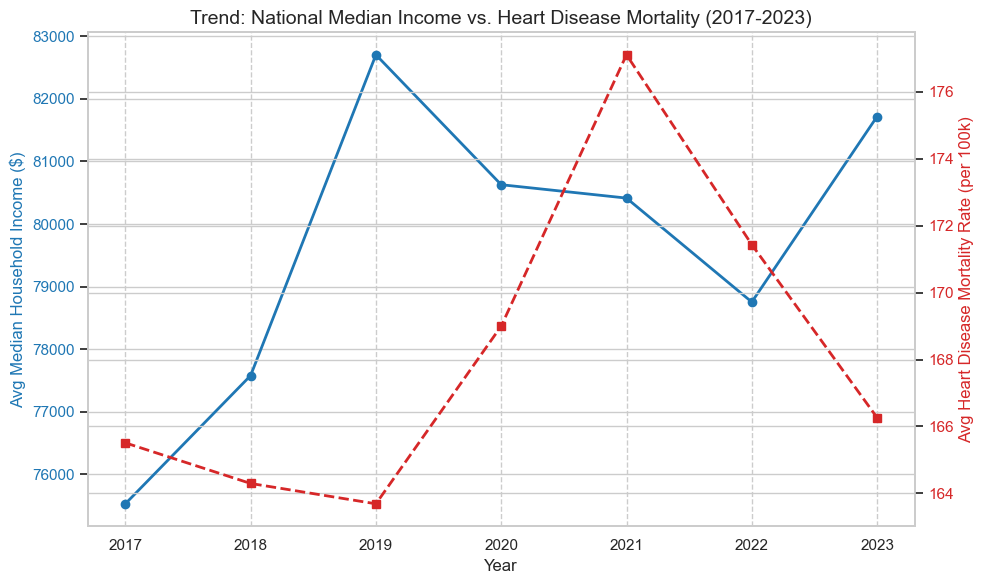

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
color_inc = 'tab:blue'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Avg Median Household Income ($)', color=color_inc, fontsize=12)
ax1.plot(df_trend['Year'], df_trend['Median_Income'], color=color_inc, marker='o', linewidth=2, label='Income')
ax1.tick_params(axis='y', labelcolor=color_inc)
ax1.grid(axis='x', linestyle='--')
ax2 = ax1.twinx()
color_mort = 'tab:red'
ax2.set_ylabel('Avg Heart Disease Mortality Rate (per 100k)', color=color_mort, fontsize=12)
ax2.plot(df_trend['Year'], df_trend['Avg_Mortality_Rate'], color=color_mort, marker='s', linewidth=2, linestyle='--', label='Mortality')
ax2.tick_params(axis='y', labelcolor=color_mort)

plt.title('Trend: National Median Income vs. Heart Disease Mortality (2017-2023)', fontsize=14)
plt.tight_layout()
plt.show()

### Generally, the lines move in opposite directions, indicating the negative correlation we found earlier (higher income -> lower heart disease mortality).
* 2019: median income hit the peak before COVID
* 2019 - 2021: a reverse direction occurred due to COVID
* 2021 - 2022: both decreased as people started taking more care of their health.
* 2022 - 2023: during the recovery from COVID, the median income started rising, while the heart disease mortality rate continued dropping.

## Counties & Median Income
### All Races (includes Hispanic/Latino), Both Sexes, All Ages, 2019-2023

In [ ]:
df_counties = pd.read_csv('HDPulse_data_export.csv', skiprows=4)
print(df_counties.head())

            County    FIPS Value (Dollars) Rank within US (of 3141 counties)
0    United States     0.0          78,538                               NaN
1       California  6000.0          96,334                           6 of 52
2   Trinity County  6105.0          53,498                             2,457
3  Siskiyou County  6093.0          55,499                             2,309
4  Imperial County  6025.0          56,393                             2,246


Text(0.5, 1.02, 'Median Household Income by County in California (High to Low)')

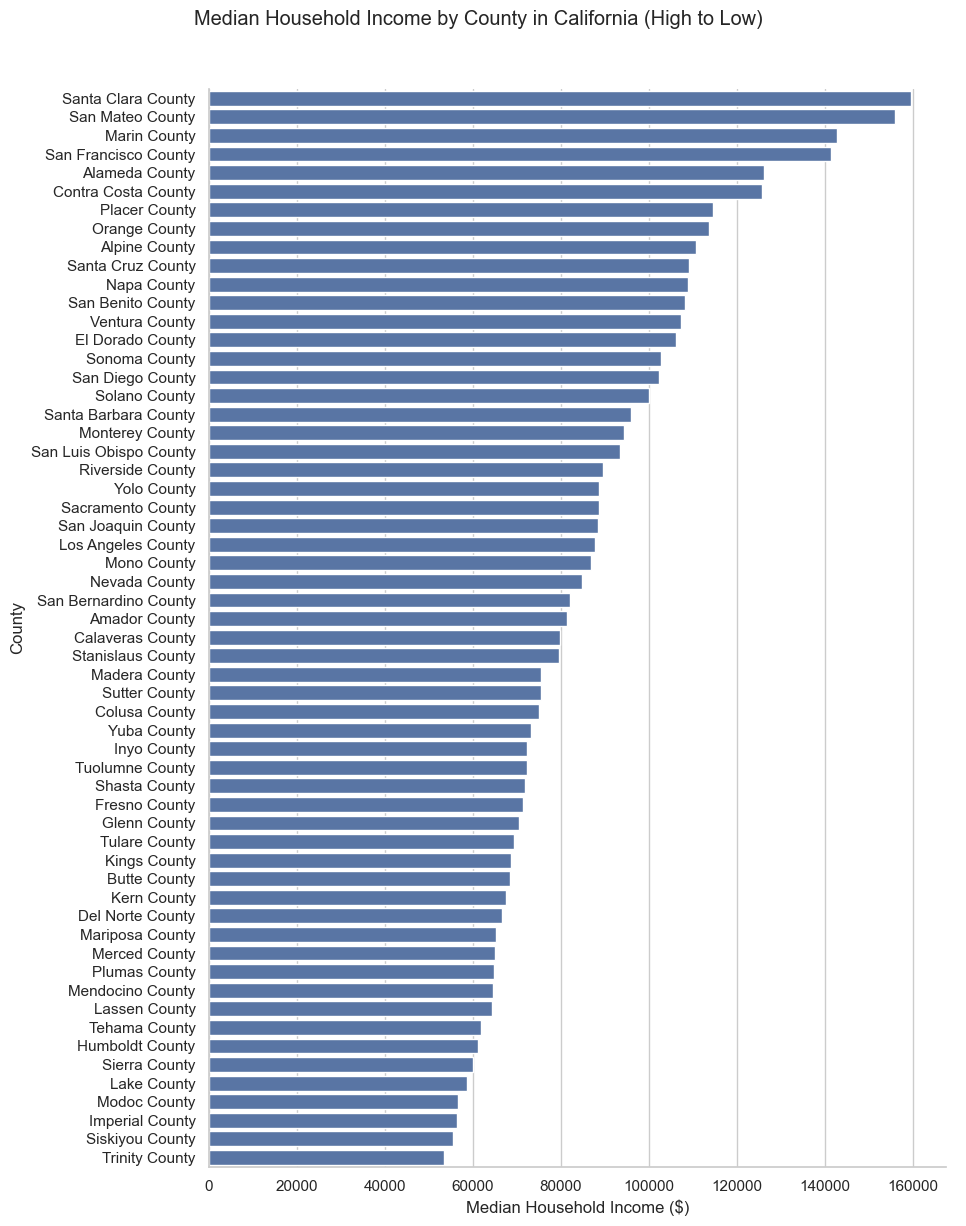

In [ ]:
df_countiescopy = df_counties[~df_counties['County'].isin(['United States', 'California'])].copy()
df_countiescopy['Value (Dollars)'] = pd.to_numeric(
    df_countiescopy['Value (Dollars)'].astype(str).str.replace(',', ''),
    errors='coerce'
)
df_countiescopy = df_countiescopy.dropna(subset=['Value (Dollars)'])
df_sortedcounties = df_countiescopy.sort_values('Value (Dollars)', ascending=False)
g = sns.catplot(
    data=df_sortedcounties,
    x='Value (Dollars)',
    y='County',
    kind='bar',
    height=12,
    aspect=0.8
)

g.set_axis_labels("Median Household Income ($)", "County")
g.fig.suptitle("Median Household Income by County in California (High to Low)", y=1.02)

plt.tight_layout()
plt.savefig('county_income_catplot_cleaned.png')
plt.show()

## Comparison: Median Income vs. Heart Disease Mortality (Avg 2019-2020)

In [ ]:
df_counties.columns = ['County', 'FIPS', 'Median_Income', 'Rank']
df_counties['Median_Income'] = pd.to_numeric(df_counties['Median_Income'].str.replace(',', ''), errors='coerce')

target_counties = ['Santa Clara County', 'Yolo County', 'Trinity County']
df_income_filtered = df_counties[df_counties['County'].isin(target_counties)].copy()
df_income_final = df_income_filtered[['County', 'Median_Income']].copy()

In [ ]:
df_mortality = pd.read_csv("HDMR2019-2020.csv")
target_counties_ca = ['Santa Clara County, CA', 'Yolo County, CA', 'Trinity County, CA']
df_mortality_filtered = df_mortality[df_mortality['County'].isin(target_counties_ca)].copy()

In [ ]:
df_mortality_filtered['Age Adjusted Rate'] = pd.to_numeric(df_mortality_filtered['Age Adjusted Rate'], errors='coerce')
df_mortality_grouped = df_mortality_filtered.groupby('County')['Age Adjusted Rate'].mean().reset_index()
df_mortality_grouped['County'] = df_mortality_grouped['County'].str.replace(', CA', '')

In [ ]:
df_merged = pd.merge(df_income_final, df_mortality_grouped, on='County')

In [ ]:
df_merged['Median Income ($1k)'] = df_merged['Median_Income'] / 1000
df_merged['Mortality Rate'] = df_merged['Age Adjusted Rate']

df_melted = df_merged.melt(id_vars=['County'],
                           value_vars=['Median Income ($1k)', 'Mortality Rate'],
                           var_name='Metric',
                           value_name='Value')

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='County', ylabel='Value'>

Text(0.5, 1.0, 'Comparison: Median Income vs. Heart Disease Mortality (Avg 2019-2020)')

Text(0, 0.5, 'Value (Income in $1k vs Rate)')

Text(0.5, 0, 'County')

Text(0, 8, '53.5')

Text(0, 8, '88.8')

Text(0, 8, '159.7')

Text(0, 8, '172.1')

Text(0, 8, '123.8')

Text(0, 8, '93.0')

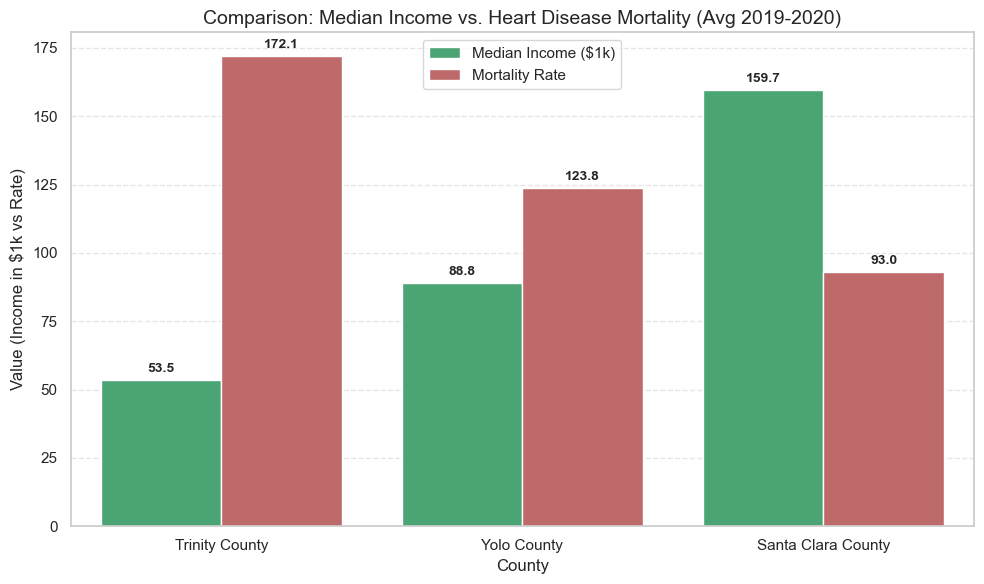

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='County', y='Value', hue='Metric', palette=['mediumseagreen', 'indianred'])

plt.title('Comparison: Median Income vs. Heart Disease Mortality (Avg 2019-2020)', fontsize=14)
plt.ylabel('Value (Income in $1k vs Rate)', fontsize=12)
plt.xlabel('County', fontsize=12)
plt.legend(title=None) # Remove legend title for cleaner look
plt.grid(axis='y', linestyle='--', alpha=0.5)
for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.gca().annotate(f'{p.get_height():.1f}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center',
                           xytext=(0, 8), textcoords='offset points',
                           fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('income_vs_mortality_comparison_bars.png')
plt.show()

### We can see an inverse relationship also exist in the counties level.

#### Income–Mortality Insight (Managerial Takeaway)

The definitive, deepening negative correlation between **median household income** and **age-adjusted heart disease mortality** (strengthening from −0.64 to −0.73) provides a crucial strategic framework for healthcare businesses and insurers.

- **Prioritize low-income areas:** These regions represent the highest risk and the greatest opportunity for impactful intervention. Managers should direct **subsidized preventive care** and **chronic disease management programs** (e.g., hypertension and cholesterol control, adherence support) to these communities first.
- **Differentiate offerings in high-income areas:** In contrast, high-income markets can be targeted with **premium wellness**, **preventive screening packages**, and **elective services** that match higher purchasing power and demand for convenience.

In short, **income can be a powerful indicator of health risk**. Organizations can refine underwriting models, optimize facility siting decisions, and align product development with precise socioeconomic needs—turning a public-health insight into a **data-driven strategy** for market efficiency and competitive advantage.


# H3 Market Volatility Linked to Heart-disease Mortality (Jennifer)

## Imports & Global Settings

In [ ]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
import yfinance as yf


from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    mean_absolute_error,
    r2_score,
    roc_curve,
    auc
)
from sklearn.calibration import calibration_curve

sns.set(style="whitegrid")

DATA_DIR = "./data"

1. Load & Clean Mortality Data (UCOD 2007–2010)

In [ ]:
ucod_raw = pd.read_csv('ucod_1999_2020.csv')

print("UCOD columns:", ucod_raw.columns.tolist())
print("Year range:", ucod_raw["Year"].min(), "to", ucod_raw["Year"].max())
display(ucod_raw.head())

# Basic cleaning & type conversion
ucod = ucod_raw.copy()

ucod["County Code"] = pd.to_numeric(ucod["County Code"], errors="coerce")
ucod["Year"]        = pd.to_numeric(ucod["Year"], errors="coerce")
ucod["Crude Rate"]  = pd.to_numeric(ucod["Crude Rate"], errors="coerce")

ucod = ucod.dropna(subset=["County Code", "Year", "Crude Rate", "County"])

# Extract state abbreviation and county name
ucod["state_abbr"]  = ucod["County"].str.extract(r",\s*([A-Z]{2})$")
ucod["county_name"] = ucod["County"].str.replace(r",\s*[A-Z]{2}$", "", regex=True)

ucod["fips"]    = ucod["County Code"].astype(int).astype(str).str.zfill(5)
ucod["year"]    = ucod["Year"].astype(int)
ucod["hd_rate"] = ucod["Crude Rate"]

# UCOD extract has 2007–2010; we still write .between for clarity
hd_us = ucod[ucod["year"].between(2003, 2020)][
    ["fips", "state_abbr", "county_name", "year", "hd_rate"]
].copy()

print("Years in hd_us:", sorted(hd_us["year"].unique()))
display(hd_us.head())

UCOD columns: ['Notes', 'Year', 'Year Code', 'County', 'County Code', 'Deaths', 'Population', 'Crude Rate']
Year range: 2007.0 to 2010.0


,Notes,Year,Year Code,County,County Code,Deaths,Population,Crude Rate
0,NaN,2007.0,2007.0,"Autauga County, AL",1001.0,35.0,52405.0,66.8
1,NaN,2007.0,2007.0,"Baldwin County, AL",1003.0,200.0,172404.0,116.0
2,NaN,2007.0,2007.0,"Barbour County, AL",1005.0,22.0,27757.0,79.3
3,NaN,2007.0,2007.0,"Bibb County, AL",1007.0,29.0,22438.0,129.2
4,NaN,2007.0,2007.0,"Blount County, AL",1009.0,85.0,56240.0,151.1


Years in hd_us: [np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010)]


,fips,state_abbr,county_name,year,hd_rate
0,01001,AL,Autauga County,2007,66.8
1,01003,AL,Baldwin County,2007,116.0
2,01005,AL,Barbour County,2007,79.3
3,01007,AL,Bibb County,2007,129.2
4,01009,AL,Blount County,2007,151.1


2. Load & Clean CA Unemployment Data

In [ ]:
u_raw = pd.read_csv('ca_unemp_annual.csv')

print("Unemployment columns:", u_raw.columns.tolist())
display(u_raw.head())

u = u_raw.copy()

# Keep county-level annual final series
u = u[
    (u["Area Type"] == "County") &
    (u["Month"] == "Annual") &
    (u["Status"] == "Final")
]

u["county_name"] = u["Area Name"]
u["year"]        = pd.to_numeric(u["Year"], errors="coerce").astype(int)
u["unemp_rate"]  = pd.to_numeric(u["Unemployment Rate"], errors="coerce")

unemp_ca = u[["county_name", "year", "unemp_rate"]].dropna()
unemp_ca = unemp_ca[unemp_ca["year"].between(2006, 2020)]

print("CA unemployment years:", unemp_ca["year"].min(), "to", unemp_ca["year"].max())
display(unemp_ca.head())

Unemployment columns: ['Area Name', 'Area Type', 'Year', 'Month', 'Seasonally Adjusted(Y/N)', 'Status', 'Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate']


,Area Name,Area Type,Year,Month,Seasonally Adjusted(Y/N),Status,Labor Force,Employment,Unemployment,Unemployment Rate
0,California,State,1990,Annual,N,Final,15176300,14301800,874500,5.8
1,Los Angeles-Long Beach-Glendale MD,Metropolitan Area,1990,Annual,N,Final,4526600,4260700,265800,5.9
2,Los Angeles County,County,1990,Annual,N,Final,4526600,4260700,265800,5.9
3,Alameda County,County,1990,Annual,N,Final,678000,650600,27500,4.0
4,Alpine County,County,1990,Annual,N,Final,380,340,40,9.6


CA unemployment years: 2006 to 2020


,county_name,year,unemp_rate
1394,Los Angeles County,2006,4.7
1395,Alameda County,2006,4.4
1396,Alpine County,2006,6.4
1398,Orange County,2006,3.4
1400,Kern County,2006,7.5


3. Financial Market Volatility (VIX) from Yahoo Finance

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf

start = dt.datetime(2000, 1, 1)
end   = dt.datetime(2023, 12, 31)

vix_ticker = yf.Ticker("^VIX")
vix_daily = vix_ticker.history(start=start, end=end)[["Close"]]
vix_daily = vix_daily.rename(columns={"Close": "vix"})

# make sure the index is datetime
vix_daily.index = pd.to_datetime(vix_daily.index)

vix_daily["year"] = vix_daily.index.year

vix_full = (
    vix_daily
    .groupby("year", as_index=False)["vix"]
    .agg(
        vix_mean = "mean",
        vix_max  = "max",
        vix_std  = "std",
        vix_p95  = lambda x: np.percentile(x.dropna(), 95),
        num_days_vix_gt_40 = lambda x: (x > 40).sum()
    )
)

for col in ["vix_mean", "vix_std", "num_days_vix_gt_40"]:
    vix_full[f"{col}_norm"] = vix_full[col] / vix_full[col].mean()

vix_full["stress_index"] = (
    vix_full["vix_mean_norm"] +
    vix_full["vix_std_norm"] +
    vix_full["num_days_vix_gt_40_norm"]
)

vix_full = vix_full[vix_full["year"].between(2003, 2020)].reset_index(drop=True)
display(vix_full.head())

,year,vix_mean,vix_max,vix_std,vix_p95,num_days_vix_gt_40,vix_mean_norm,vix_std_norm,num_days_vix_gt_40_norm,stress_index
0,2003,21.982857,34.689999,5.240754,32.267999,0,1.096595,1.067669,0.0,2.164264
1,2004,15.480357,21.580000,1.921157,18.908000,0,0.772224,0.391386,0.0,1.163610
2,2005,12.807063,17.740000,1.474675,15.586000,0,0.638869,0.300427,0.0,0.939296
3,2006,12.806534,23.809999,2.253059,17.730000,0,0.638843,0.459003,0.0,1.097845
4,2007,17.535936,31.090000,5.362618,26.485000,0,0.874765,1.092496,0.0,1.967260


4. Merge VIX with Mortality & Build CA Panel 2007–2010

In [ ]:
# Merge VIX onto all US counties
panel_us = hd_us.merge(
    vix_full[["year", "vix_mean", "vix_max", "vix_std", "stress_index"]],
    on="year", how="left"
)

display(panel_us.head())

# California only
hd_ca = panel_us[panel_us["state_abbr"] == "CA"].copy()

panel_ca = hd_ca.merge(
    unemp_ca,
    on=["county_name", "year"],
    how="left"
)

# Restrict to available years (should be 2007–2010 for UCOD + 2006+ for unemployment)
panel_ca = panel_ca[panel_ca["year"].between(2006, 2020)].copy()

print("Panel CA (UCOD 2007–2010) shape:", panel_ca.shape)
display(panel_ca.head())

,fips,state_abbr,county_name,year,hd_rate,vix_mean,vix_max,vix_std,stress_index
0,01001,AL,Autauga County,2007,66.8,17.535936,31.09,5.362618,1.96726
1,01003,AL,Baldwin County,2007,116.0,17.535936,31.09,5.362618,1.96726
2,01005,AL,Barbour County,2007,79.3,17.535936,31.09,5.362618,1.96726
3,01007,AL,Bibb County,2007,129.2,17.535936,31.09,5.362618,1.96726
4,01009,AL,Blount County,2007,151.1,17.535936,31.09,5.362618,1.96726


Panel CA (UCOD 2007–2010) shape: (214, 10)


,fips,state_abbr,county_name,year,hd_rate,vix_mean,vix_max,vix_std,stress_index,unemp_rate
0,06001,CA,Alameda County,2007,118.6,17.535936,31.09,5.362618,1.96726,4.7
1,06005,CA,Amador County,2007,149.7,17.535936,31.09,5.362618,1.96726,5.8
2,06007,CA,Butte County,2007,185.3,17.535936,31.09,5.362618,1.96726,6.6
3,06009,CA,Calaveras County,2007,162.1,17.535936,31.09,5.362618,1.96726,6.4
4,06011,CA,Colusa County,2007,132.9,17.535936,31.09,5.362618,1.96726,11.7


5. Average Over Year Windows

In [ ]:
def mean_over_years(df, years, col, new_name):
    """
    Compute county-level (by fips) mean of `col` over the given list of `years`.
    """
    return (
        df[df["year"].isin(years)]
        .groupby("fips", as_index=False)[col]
        .mean()
        .rename(columns={col: new_name})
    )

6. Construct 2008 Crisis Deltas (CA counties)

In [ ]:
#    Pre: 2006–2007   Post: 2009–2010

# Heart disease
hd_pre_2008  = mean_over_years(panel_ca, [2006, 2007], "hd_rate", "hd_pre_2008")
hd_post_2008 = mean_over_years(panel_ca, [2009, 2010], "hd_rate", "hd_post_2008")

# Unemployment
u_pre_2008   = mean_over_years(panel_ca, [2006, 2007], "unemp_rate", "u_pre_2008")
u_post_2008  = mean_over_years(panel_ca, [2009, 2010], "unemp_rate", "u_post_2008")

crisis_2008 = (
    hd_pre_2008
    .merge(hd_post_2008, on="fips", how="inner")
    .merge(u_pre_2008,   on="fips", how="left")
    .merge(u_post_2008,  on="fips", how="left")
)

crisis_2008["delta_hd_2008"] = crisis_2008["hd_post_2008"] - crisis_2008["hd_pre_2008"]
crisis_2008["delta_u_2008"]  = crisis_2008["u_post_2008"]  - crisis_2008["u_pre_2008"]

print("Crisis_2008 deltas:")
display(crisis_2008[["delta_hd_2008", "delta_u_2008"]].describe())

Crisis_2008 deltas:


,delta_hd_2008,delta_u_2008
count,53.000000,53.000000
mean,-5.903774,6.648113
std,20.336016,1.267492
min,-35.050000,4.250000
25%,-16.350000,5.650000
50%,-8.600000,6.550000
75%,-2.250000,7.650000
max,78.150000,10.650000


7. Descriptive Figures — Volatility & Mortality (2008)

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='year', ylabel='vix_mean'>

Text(0.5, 1.0, 'Figure 1a. Annual Mean VIX, 2003–2020')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Mean VIX')

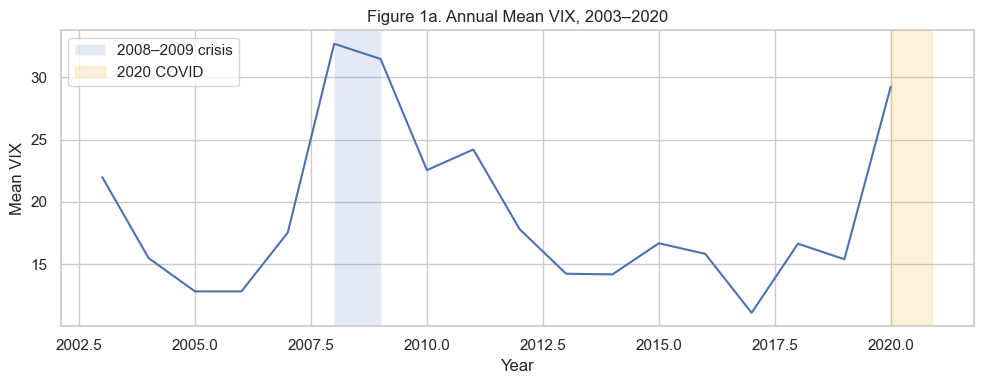

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='year', ylabel='hd_rate_mean'>

Text(0.5, 1.0, 'Figure 1b. Mean Heart Disease Mortality — US Counties (2007–2010)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Mean Heart Disease Mortality Rate')

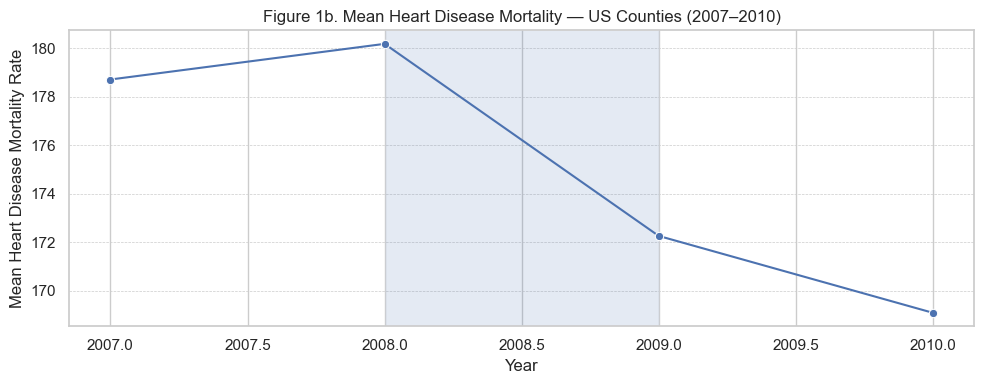

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='delta_hd_2008', ylabel='Count'>

Text(0.5, 1.0, 'Figure 1c. Distribution of Heart Disease Mortality Changes\n2008 Financial Crisis (CA counties)')

Text(0.5, 0, 'Δ HD (2009–2010 vs 2006–2007)')

Text(0, 0.5, 'Number of Counties')

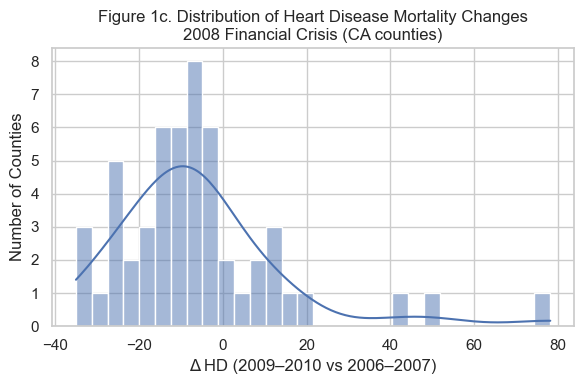

In [ ]:
# 7.1 Figure 1a: Annual Mean VIX, 2003–2020
plt.figure(figsize=(10, 4))
sns.lineplot(data=vix_full, x="year", y="vix_mean")
plt.axvspan(2008, 2009, alpha=0.15, label="2008–2009 crisis")
plt.axvspan(2020, 2020.9, alpha=0.15, color="orange", label="2020 COVID")
plt.title("Figure 1a. Annual Mean VIX, 2003–2020")
plt.xlabel("Year")
plt.ylabel("Mean VIX")
plt.legend()
plt.tight_layout()
plt.show()

# 7.2 Figure 1b: Mean Heart Disease Mortality — US Counties (2007–2010)
ts_us = (
    panel_us
    .groupby("year", as_index=False)
    .agg(hd_rate_mean=("hd_rate", "mean"))
)

plt.figure(figsize=(10, 4))
sns.lineplot(data=ts_us, x="year", y="hd_rate_mean", marker="o")

plt.axvspan(2008, 2009, alpha=0.15)

plt.title("Figure 1b. Mean Heart Disease Mortality — US Counties (2007–2010)")
plt.xlabel("Year")
plt.ylabel("Mean Heart Disease Mortality Rate")
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# 7.3 Figure 1c: Distribution of ΔHD in 2008 Crisis (CA counties)
plt.figure(figsize=(6, 4))
sns.histplot(crisis_2008["delta_hd_2008"].dropna(), bins=30, kde=True)
plt.title("Figure 1c. Distribution of Heart Disease Mortality Changes\n2008 Financial Crisis (CA counties)")
plt.xlabel("Δ HD (2009–2010 vs 2006–2007)")
plt.ylabel("Number of Counties")
plt.tight_layout()
plt.show()

Figure 1a. Annual Mean VIX, 2003-2020: Proxy for systematic financial stress
Figure 1b. Mean Heart Disease Mortality- US Counties (2007-2010): Decrease during 2008-2009 crisis contradicts expectations of stress-induced mortality spikes
Figure 1c. Distribution of CA Counties Changes: Pattern implies strong county-level heterogeneity

8. Table 1 — Summary Statistics (CA panel, 2007–2010)

In [ ]:
table1 = panel_ca[["hd_rate", "unemp_rate", "vix_mean", "stress_index"]].describe().T
display(table1.round(3))

,count,mean,std,min,25%,50%,75%,max
hd_rate,214.0,136.291,37.333,59.200,112.050,131.600,153.000,296.600
unemp_rate,214.0,10.482,4.317,3.600,7.225,10.100,13.250,29.100
vix_mean,214.0,26.073,6.292,17.536,22.549,27.014,31.479,32.693
stress_index,214.0,7.189,4.969,1.967,2.582,6.894,11.207,13.010


9. Table 2 — Crisis vs Non-Crisis Years (CA counties)

In [ ]:
#    Normal: 2007 & 2010; Crisis: 2008–2009

year_stats = (
    panel_ca
    .groupby("year", as_index=False)
    .agg(
        hd_rate_mean=("hd_rate", "mean"),
        unemp_mean=("unemp_rate", "mean")
    )
)

normal_years = [2007, 2010]
crisis_years = [2008, 2009]

normal = year_stats[year_stats["year"].isin(normal_years)]
crisis = year_stats[year_stats["year"].isin(crisis_years)]

table2 = pd.DataFrame({
    "Group": ["Normal years", "Crisis years (2008–2009)"],
    "Years": ["2007 & 2010", "2008–2009"],
    "Mean HD Mortality": [normal["hd_rate_mean"].mean(), crisis["hd_rate_mean"].mean()],
    "Mean Unemployment": [normal["unemp_mean"].mean(), crisis["unemp_mean"].mean()]
})

display(table2.round(3))

,Group,Years,Mean HD Mortality,Mean Unemployment
0,Normal years,2007 & 2010,134.647,10.253
1,Crisis years (2008–2009),2008–2009,137.991,10.657


10. OLS — ΔHD_2008 on ΔUnemployment_2008

In [ ]:
def run_ols(df, y, X_cols):
    """
    Run OLS with HC3 robust SE, dropping missing values on y and X_cols.
    """
    df_clean = df.dropna(subset=[y] + X_cols).copy()
    if len(df_clean) == 0:
        print(f"No valid data after dropping NaNs for {y} and {X_cols}")
        return None

    X = sm.add_constant(df_clean[X_cols])
    model = sm.OLS(df_clean[y], X).fit(cov_type="HC3")
    return model

m08 = run_ols(crisis_2008, "delta_hd_2008", ["delta_u_2008"])

if m08 is not None:
    print(m08.summary())

                            OLS Regression Results                            
Dep. Variable:          delta_hd_2008   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                   0.01566
Date:                Sun, 07 Dec 2025   Prob (F-statistic):              0.901
Time:                        14:49:20   Log-Likelihood:                -234.34
No. Observations:                  53   AIC:                             472.7
Df Residuals:                      51   BIC:                             476.6
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -8.3027     18.611     -0.446   

11. 2008 — Scatter: ΔU vs ΔHD

<Figure size 600x500 with 0 Axes>

<Axes: xlabel='delta_u_2008', ylabel='delta_hd_2008'>

Text(0.5, 0, 'Δ Unemployment rate (2009–2010 vs 2006–2007)')

Text(0, 0.5, 'Δ HD mortality (per 100k, 2009–2010 vs 2006–2007)')

Text(0.5, 1.0, 'County-Level Changes: Unemployment vs Heart Disease (2008 Crisis)')

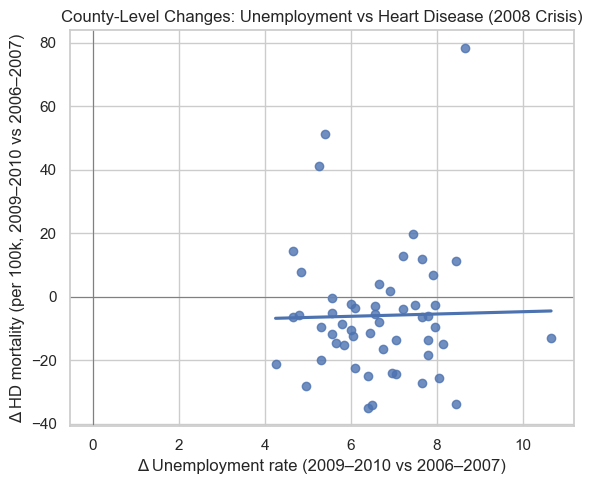

In [ ]:
plt.figure(figsize=(6, 5))
sns.regplot(
    data=crisis_2008,
    x="delta_u_2008",
    y="delta_hd_2008",
    ci=None
)
plt.axhline(0, color="grey", linewidth=0.8)
plt.axvline(0, color="grey", linewidth=0.8)
plt.xlabel("Δ Unemployment rate (2009–2010 vs 2006–2007)")
plt.ylabel("Δ HD mortality (per 100k, 2009–2010 vs 2006–2007)")
plt.title("County-Level Changes: Unemployment vs Heart Disease (2008 Crisis)")
plt.tight_layout()
plt.show()

County-Level Changes- Shows that during the 2008 crisis, counties with larger increases in unemployment did not experience systematically worse changes in heart-disease mortality.

12. Heterogeneity: High vs Low Pre-crisis HD (2008)

In [ ]:
crisis_2008_h = crisis_2008.copy()
threshold = crisis_2008_h["hd_pre_2008"].median()
crisis_2008_h["high_hd_pre"] = (crisis_2008_h["hd_pre_2008"] > threshold).astype(int)

print("Mean deltas by baseline HD group:")
display(crisis_2008_h.groupby("high_hd_pre")[["delta_hd_2008", "delta_u_2008"]].mean())

# Interaction regression
crisis_2008_int = crisis_2008_h.dropna(subset=["delta_hd_2008", "delta_u_2008", "high_hd_pre"])
X_int = sm.add_constant(crisis_2008_int[["delta_u_2008", "high_hd_pre"]])
X_int["int_term"] = crisis_2008_int["delta_u_2008"] * crisis_2008_int["high_hd_pre"]
y_int = crisis_2008_int["delta_hd_2008"]

model_int = sm.OLS(y_int, X_int).fit(cov_type="HC3")
print(model_int.summary())

Mean deltas by baseline HD group:


,delta_hd_2008,delta_u_2008
high_hd_pre,,
0,0.727778,6.575926
1,-12.790385,6.723077


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
                            OLS Regression Results                            
Dep. Variable:          delta_hd_2008   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2.247
Date:                Sun, 07 Dec 2025   Prob (F-statistic):             0.0946
Time:                        14:59:52   Log-Likelihood:                -230.36
No. Observations:                  53   AIC:                             468.7
Df Residuals:                      49   BIC:                             476.6
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|

13. ML Classification — 2008 Crisis (worsen vs not)

In [ ]:
# Label: did heart disease mortality increase?
crisis_2008_ml = crisis_2008.copy()
crisis_2008_ml["worsen_2008"] = (crisis_2008_ml["delta_hd_2008"] > 0).astype(int)

feature_cols_2008 = ["hd_pre_2008", "u_pre_2008", "delta_u_2008"]
target_col_2008   = "worsen_2008"

ml_2008 = crisis_2008_ml[feature_cols_2008 + [target_col_2008]].dropna()

print("2008 ML dataset shape:", ml_2008.shape)
display(ml_2008.head())

X_08 = ml_2008[feature_cols_2008].values
y_08 = ml_2008[target_col_2008].values

X08_train, X08_test, y08_train, y08_test = train_test_split(
    X_08, y_08, test_size=0.3, random_state=42, stratify=y_08
)

print("2008 — Train size:", X08_train.shape[0], "Test size:", X08_test.shape[0])
print("2008 — Positive rate (worsen=1):", round(y_08.mean(), 3))

# Logistic Regression pipeline
logit_08 = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(class_weight="balanced", random_state=42))
])

logit_08.fit(X08_train, y08_train)

y08_pred = logit_08.predict(X08_test)
y08_prob = logit_08.predict_proba(X08_test)[:, 1]

print("2008 Logistic Regression — Test set")
print("Accuracy:", round(accuracy_score(y08_test, y08_pred), 3))
print("ROC–AUC:", round(roc_auc_score(y08_test, y08_prob), 3))
print("\nConfusion matrix:\n", confusion_matrix(y08_test, y08_pred))
print("\nClassification report:\n", classification_report(y08_test, y08_pred))

# Random Forest classifier
rf_08 = RandomForestClassifier(
    n_estimators=500,
    max_depth=3,
    random_state=42,
    class_weight="balanced"
)

rf_08.fit(X08_train, y08_train)

y08_pred_rf = rf_08.predict(X08_test)
y08_prob_rf = rf_08.predict_proba(X08_test)[:, 1]

print("2008 Random Forest — Test set")
print("Accuracy:", round(accuracy_score(y08_test, y08_pred_rf), 3))
print("ROC–AUC:", round(roc_auc_score(y08_test, y08_prob_rf), 3))
print("\nConfusion matrix:\n", confusion_matrix(y08_test, y08_pred_rf))
print("\nClassification report:\n", classification_report(y08_test, y08_pred_rf))

2008 ML dataset shape: (53, 4)


,hd_pre_2008,u_pre_2008,delta_u_2008,worsen_2008
0,118.6,4.7,6.10,0
1,149.7,5.8,7.20,1
2,185.3,6.6,6.75,0
3,162.1,6.4,7.95,0
4,132.9,11.7,6.50,0


2008 — Train size: 37 Test size: 16
2008 — Positive rate (worsen=1): 0.226


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(class_weight='balanced', random_state=42))])

2008 Logistic Regression — Test set
Accuracy: 0.875
ROC–AUC: 0.708

Confusion matrix:
 [[11  1]
 [ 1  3]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.75      0.75      0.75         4

    accuracy                           0.88        16
   macro avg       0.83      0.83      0.83        16
weighted avg       0.88      0.88      0.88        16



RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=500,
                       random_state=42)

2008 Random Forest — Test set
Accuracy: 0.75
ROC–AUC: 0.688

Confusion matrix:
 [[12  0]
 [ 4  0]]

Classification report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       0.00      0.00      0.00         4

    accuracy                           0.75        16
   macro avg       0.38      0.50      0.43        16
weighted avg       0.56      0.75      0.64        16



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


14. Cross-Validation & Feature Importance — 2008

2008 Logistic ROC–AUC (5-fold): [0.5   0.5   0.75  0.625 0.688] mean = 0.612
2008 Random Forest ROC–AUC (5-fold): [0.611 0.625 0.5   0.75  0.312] mean = 0.56


<Figure size 600x400 with 0 Axes>

<Axes: xlabel='importance', ylabel='feature'>

Text(0.5, 1.0, '2008 Random Forest Feature Importance')

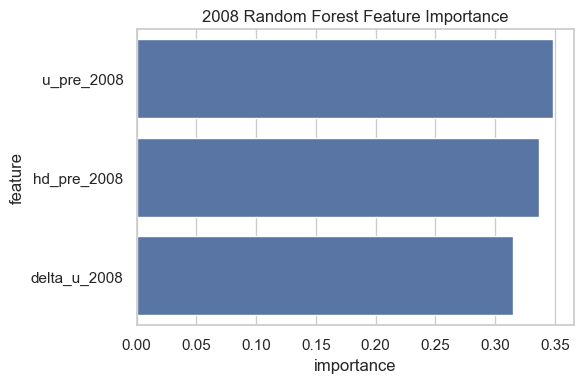

,feature,importance
1,u_pre_2008,0.348398
0,hd_pre_2008,0.336597
2,delta_u_2008,0.315005


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logit_08_cv = cross_val_score(logit_08, X_08, y_08, cv=cv, scoring="roc_auc")
rf_08_cv    = cross_val_score(rf_08,    X_08, y_08, cv=cv, scoring="roc_auc")

print("2008 Logistic ROC–AUC (5-fold):", logit_08_cv.round(3),
      "mean =", round(logit_08_cv.mean(), 3))
print("2008 Random Forest ROC–AUC (5-fold):", rf_08_cv.round(3),
      "mean =", round(rf_08_cv.mean(), 3))

# RF feature importance
importances_08 = rf_08.feature_importances_
feat_imp_08 = pd.DataFrame({
    "feature": feature_cols_2008,
    "importance": importances_08
}).sort_values("importance", ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=feat_imp_08, x="importance", y="feature")
plt.title("2008 Random Forest Feature Importance")
plt.tight_layout()
plt.show()

display(feat_imp_08)

15. Add 2020 Mortality Data (WONDER 2017–2020)

In [ ]:
wonder_raw = pd.read_csv("wonder_heart_2017_2020.csv")

print("WONDER columns:", wonder_raw.columns.tolist())
display(wonder_raw.head())

wonder = wonder_raw.copy()

wonder["County Code"] = pd.to_numeric(wonder["County Code"], errors="coerce")
wonder["Year"]        = pd.to_numeric(wonder["Year"], errors="coerce")
wonder["Crude Rate"]  = pd.to_numeric(wonder["Crude Rate"], errors="coerce")

wonder = wonder.dropna(subset=["County Code", "Year", "Crude Rate", "County"])

wonder["state_abbr"]  = wonder["County"].str.extract(r",\s*([A-Z]{2})$")
wonder["county_name"] = wonder["County"].str.replace(r",\s*[A-Z]{2}$", "", regex=True)

wonder["fips"]    = wonder["County Code"].astype(int).astype(str).str.zfill(5)
wonder["year"]    = wonder["Year"].astype(int)
wonder["hd_rate"] = wonder["Crude Rate"]

hd_us_2020 = wonder[wonder["year"].between(2017, 2020)][
    ["fips", "state_abbr", "county_name", "year", "hd_rate"]
].copy()

print("Years in hd_us_2020:", sorted(hd_us_2020["year"].unique()))
display(hd_us_2020.head())

WONDER columns: ['Notes', 'County', 'County Code', 'Year', 'Year Code', 'Deaths', 'Population', 'Crude Rate']


,Notes,County,County Code,Year,Year Code,Deaths,Population,Crude Rate
0,NaN,"Autauga County, AL",1001.0,2017.0,2017.0,126.0,55504.0,227.0
1,NaN,"Autauga County, AL",1001.0,2018.0,2018.0,126.0,55601.0,226.6
2,NaN,"Autauga County, AL",1001.0,2019.0,2019.0,131.0,55869.0,234.5
3,NaN,"Autauga County, AL",1001.0,2020.0,2020.0,155.0,56145.0,276.1
4,NaN,"Baldwin County, AL",1003.0,2017.0,2017.0,573.0,212628.0,269.5


Years in hd_us_2020: [np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020)]


,fips,state_abbr,county_name,year,hd_rate
0,01001,AL,Autauga County,2017,227.0
1,01001,AL,Autauga County,2018,226.6
2,01001,AL,Autauga County,2019,234.5
3,01001,AL,Autauga County,2020,276.1
4,01003,AL,Baldwin County,2017,269.5


16. CA Panel 2017–2020 + Crisis 2020 Deltas

In [ ]:
# CA counties only
hd_ca_2020 = hd_us_2020[hd_us_2020["state_abbr"] == "CA"].copy()

panel_ca_2020 = hd_ca_2020.merge(
    unemp_ca,
    on=["county_name", "year"],
    how="left"
)

panel_ca_2020 = panel_ca_2020[panel_ca_2020["year"].between(2017, 2020)].copy()

print("Panel CA 2020 shape:", panel_ca_2020.shape)
display(panel_ca_2020.head())

# Pre-2020 vs 2020
hd_pre_2020 = mean_over_years(panel_ca_2020, [2017, 2018, 2019], "hd_rate", "hd_pre_2020")
u_pre_2020  = mean_over_years(panel_ca_2020, [2017, 2018, 2019], "unemp_rate", "u_pre_2020")

hd_2020 = panel_ca_2020[panel_ca_2020["year"] == 2020][["fips", "hd_rate"]].rename(columns={"hd_rate": "hd_2020"})
u_2020  = panel_ca_2020[panel_ca_2020["year"] == 2020][["fips", "unemp_rate"]].rename(columns={"unemp_rate": "u_2020"})

crisis_2020 = (
    hd_pre_2020
    .merge(hd_2020, on="fips", how="inner")
    .merge(u_pre_2020, on="fips", how="left")
    .merge(u_2020,   on="fips", how="left")
)

crisis_2020["delta_hd_2020"] = crisis_2020["hd_2020"] - crisis_2020["hd_pre_2020"]
crisis_2020["delta_u_2020"]  = crisis_2020["u_2020"]  - crisis_2020["u_pre_2020"]

print("Crisis_2020 deltas:")
display(crisis_2020[["delta_hd_2020", "delta_u_2020"]].describe())

Panel CA 2020 shape: (220, 6)


,fips,state_abbr,county_name,year,hd_rate,unemp_rate
0,06001,CA,Alameda County,2017,119.4,3.5
1,06001,CA,Alameda County,2018,121.1,2.9
2,06001,CA,Alameda County,2019,123.6,2.8
3,06001,CA,Alameda County,2020,126.4,8.5
4,06005,CA,Amador County,2017,290.0,5.1


Crisis_2020 deltas:


,delta_hd_2020,delta_u_2020
count,55.000000,55.000000
mean,6.276970,4.360606
std,22.034885,1.131936
min,-52.733333,1.233333
25%,-2.316667,3.700000
50%,7.166667,4.433333
75%,18.666667,5.066667
max,62.300000,7.666667


17. ML Classification — 2020 COVID Shock

In [ ]:
crisis_2020_ml = crisis_2020.copy()
crisis_2020_ml["worsen_2020"] = (crisis_2020_ml["delta_hd_2020"] > 0).astype(int)

feature_cols_2020 = ["hd_pre_2020", "u_pre_2020", "delta_u_2020"]
target_col_2020   = "worsen_2020"

ml_2020 = crisis_2020_ml[feature_cols_2020 + [target_col_2020]].dropna()

print("2020 ML dataset shape:", ml_2020.shape)
display(ml_2020.head())

X_20 = ml_2020[feature_cols_2020].values
y_20 = ml_2020[target_col_2020].values

X20_train, X20_test, y20_train, y20_test = train_test_split(
    X_20, y_20, test_size=0.3, random_state=42, stratify=y_20
)

print("2020 — Train size:", X20_train.shape[0], "Test size:", X20_test.shape[0])
print("2020 — Positive rate (worsen=1):", round(y_20.mean(), 3))

# Logistic
logit_20 = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(class_weight="balanced", random_state=42))
])

logit_20.fit(X20_train, y20_train)

y20_pred = logit_20.predict(X20_test)
y20_prob = logit_20.predict_proba(X20_test)[:, 1]

print("2020 Logistic Regression — Test set")
print("Accuracy:", round(accuracy_score(y20_test, y20_pred), 3))
print("ROC–AUC:", round(roc_auc_score(y20_test, y20_prob), 3))
print("\nConfusion matrix:\n", confusion_matrix(y20_test, y20_pred))
print("\nClassification report:\n", classification_report(y20_test, y20_pred))

# Random Forest
rf_20 = RandomForestClassifier(
    n_estimators=500,
    max_depth=3,
    random_state=42,
    class_weight="balanced"
)

rf_20.fit(X20_train, y20_train)

y20_pred_rf = rf_20.predict(X20_test)
y20_prob_rf = rf_20.predict_proba(X20_test)[:, 1]

print("2020 Random Forest — Test set")
print("Accuracy:", round(accuracy_score(y20_test, y20_pred_rf), 3))
print("ROC–AUC:", round(roc_auc_score(y20_test, y20_prob_rf), 3))
print("\nConfusion matrix:\n", confusion_matrix(y20_test, y20_pred_rf))
print("\nClassification report:\n", classification_report(y20_test, y20_pred_rf))

2020 ML dataset shape: (55, 4)


,hd_pre_2020,u_pre_2020,delta_u_2020,worsen_2020
0,121.366667,3.066667,5.433333,1
1,292.000000,4.400000,5.000000,1
2,231.766667,5.400000,4.100000,0
3,258.033333,5.400000,4.400000,1
4,176.900000,13.033333,2.866667,1


2020 — Train size: 38 Test size: 17
2020 — Positive rate (worsen=1): 0.673


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(class_weight='balanced', random_state=42))])

2020 Logistic Regression — Test set
Accuracy: 0.588
ROC–AUC: 0.652

Confusion matrix:
 [[2 4]
 [3 8]]

Classification report:
               precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.67      0.73      0.70        11

    accuracy                           0.59        17
   macro avg       0.53      0.53      0.53        17
weighted avg       0.57      0.59      0.58        17



RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=500,
                       random_state=42)

2020 Random Forest — Test set
Accuracy: 0.588
ROC–AUC: 0.545

Confusion matrix:
 [[1 5]
 [2 9]]

Classification report:
               precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.64      0.82      0.72        11

    accuracy                           0.59        17
   macro avg       0.49      0.49      0.47        17
weighted avg       0.53      0.59      0.54        17



18. Cross-Validation & Feature Importance — 2020

2020 Logistic ROC–AUC (5-fold): [0.792 0.708 0.75  0.893 0.821] mean = 0.793
2020 Random Forest ROC–AUC (5-fold): [0.792 0.708 0.786 0.643 0.857] mean = 0.757


<Figure size 600x400 with 0 Axes>

<Axes: xlabel='importance', ylabel='feature'>

Text(0.5, 1.0, '2020 Random Forest Feature Importance')

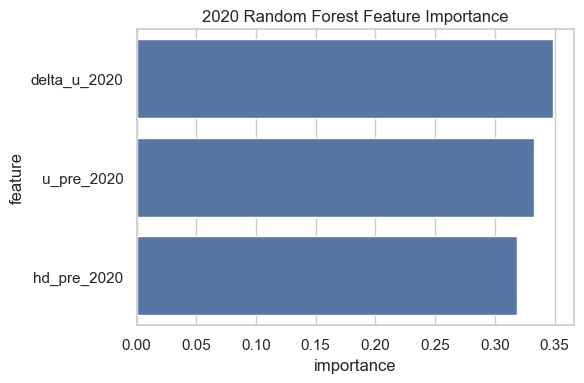

,feature,importance
2,delta_u_2020,0.348849
1,u_pre_2020,0.332756
0,hd_pre_2020,0.318395


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logit_20_cv = cross_val_score(logit_20, X_20, y_20, cv=cv, scoring="roc_auc")
rf_20_cv    = cross_val_score(rf_20,    X_20, y_20, cv=cv, scoring="roc_auc")

print("2020 Logistic ROC–AUC (5-fold):", logit_20_cv.round(3),
      "mean =", round(logit_20_cv.mean(), 3))
print("2020 Random Forest ROC–AUC (5-fold):", rf_20_cv.round(3),
      "mean =", round(rf_20_cv.mean(), 3))

importances_20 = rf_20.feature_importances_
feat_imp_20 = pd.DataFrame({
    "feature": feature_cols_2020,
    "importance": importances_20
}).sort_values("importance", ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=feat_imp_20, x="importance", y="feature")
plt.title("2020 Random Forest Feature Importance")
plt.tight_layout()
plt.show()

display(feat_imp_20)

In both 2008 and 2020, all three features (pre-crisis mortality, pre-crisis unemployment, and the unemployment shock ΔU) have very similar importance in the random forest.
This suggests that baseline vulnerability and crisis intensity both matter; no single predictor dominates.
The small differences in bar height likely reflect sampling noise, so the main takeaway is that each feature contributes meaningfully to predicting which counties worsen.

19. Figure 2a — ROC Curves (2008 vs 2020 Logistic Models)

<Figure size 700x600 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Figure 2a. ROC Curves — Crisis Risk Models (2008 vs 2020)')

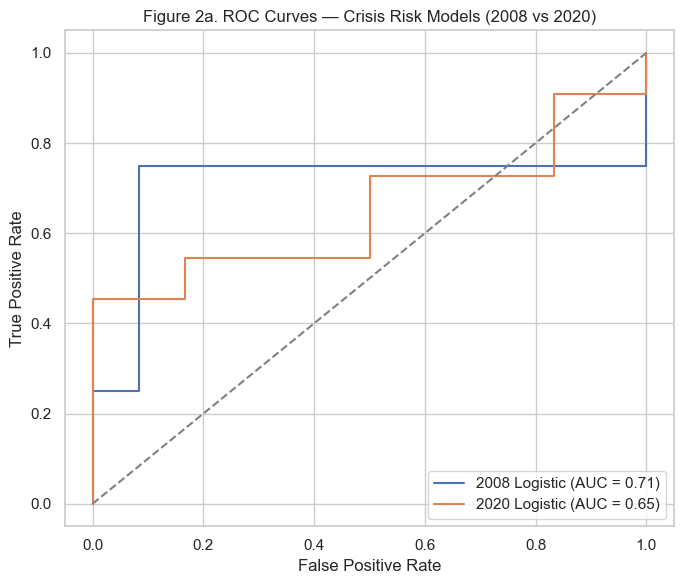

In [ ]:
plt.figure(figsize=(7, 6))

# 2008 Logistic ROC
fpr08, tpr08, _ = roc_curve(y08_test, y08_prob)
auc08 = auc(fpr08, tpr08)
plt.plot(fpr08, tpr08, label=f"2008 Logistic (AUC = {auc08:.2f})")

# 2020 Logistic ROC
fpr20, tpr20, _ = roc_curve(y20_test, y20_prob)
auc20 = auc(fpr20, tpr20)
plt.plot(fpr20, tpr20, label=f"2020 Logistic (AUC = {auc20:.2f})")

plt.plot([0, 1], [0, 1], "--", color="grey")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Figure 2a. ROC Curves — Crisis Risk Models (2008 vs 2020)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

ROC Curve- Shows the models are better than random above 45-degrees line

Quantifies “how much better” (AUC)
2008: moderate discrimination (0.71)
2020: weaker but non-trivial discrimination (0.65)

Compare crises
    same feature set (pre-crisis HD, pre-crisis unemployment, and the unemployment shock), the 2008 crisis is somewhat more predictable than the 2020 COVID shock

False Positive Rate: how many safe counties incorrectly flag
True Positive Rate: how many truly “worsening” counties correctly flag

20. Figures 2b & 2c — ΔU Terciles vs ΔHD (2008 & 2020)

In [ ]:
# 2008 terciles
crisis_2008_q = crisis_2008.dropna(subset=["delta_u_2008", "delta_hd_2008"]).copy()
crisis_2008_q["shock_tercile"] = pd.qcut(
    crisis_2008_q["delta_u_2008"],
    q=3,
    labels=["Low ΔU", "Mid ΔU", "High ΔU"]
)

group_2008 = (
    crisis_2008_q
    .groupby("shock_tercile", as_index=False)
    .agg(
        mean_delta_hd=("delta_hd_2008", "mean"),
        mean_delta_u=("delta_u_2008", "mean"),
        n=("fips", "count")
    )
)
display(group_2008)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=group_2008,
    x="shock_tercile",
    y="mean_delta_hd"
)
plt.axhline(0, color="grey", linewidth=0.8)
plt.xlabel("Unemployment shock tercile (2008)")
plt.ylabel("Mean Δ HD mortality (per 100k)")
plt.title("Figure 2b. Heart Disease Mortality Changes by Unemployment Shock — 2008")
plt.tight_layout()
plt.show()

# 2020 terciles
crisis_2020_q = crisis_2020.dropna(subset=["delta_u_2020", "delta_hd_2020"]).copy()
crisis_2020_q["shock_tercile"] = pd.qcut(
    crisis_2020_q["delta_u_2020"],
    q=3,
    labels=["Low ΔU", "Mid ΔU", "High ΔU"]
)

group_2020 = (
    crisis_2020_q
    .groupby("shock_tercile", as_index=False)
    .agg(
        mean_delta_hd=("delta_hd_2020", "mean"),
        mean_delta_u=("delta_u_2020", "mean"),
        n=("fips", "count")
    )
)
display(group_2020)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=group_2020,
    x="shock_tercile",
    y="mean_delta_hd"
)
plt.axhline(0, color="grey", linewidth=0.8)
plt.xlabel("Unemployment shock tercile (2020)")
plt.ylabel("Mean Δ HD mortality (per 100k)")
plt.title("Figure 2c. Heart Disease Mortality Changes by Unemployment Shock — 2020")
plt.tight_layout()
plt.show()

22. ML Model Comparison Table (2008 vs 2020)

In [ ]:
def summarize_model(name, y_true, y_prob, y_pred, cv_scores):
    return {
        "Model": name,
        "Test Accuracy": accuracy_score(y_true, y_pred),
        "Test ROC_AUC": roc_auc_score(y_true, y_prob),
        "CV ROC_AUC (mean)": cv_scores.mean(),
        "CV ROC_AUC (min)": cv_scores.min(),
        "CV ROC_AUC (max)": cv_scores.max(),
        "N test": len(y_true)
    }

summary_2008_logit = summarize_model(
    "2008 – Logistic",
    y08_test, y08_prob, y08_pred,
    logit_08_cv
)

summary_2008_rf = summarize_model(
    "2008 – Random Forest",
    y08_test, y08_prob_rf, y08_pred_rf,
    rf_08_cv
)

summary_2020_logit = summarize_model(
    "2020 – Logistic",
    y20_test, y20_prob, y20_pred,
    logit_20_cv
)

summary_2020_rf = summarize_model(
    "2020 – Random Forest",
    y20_test, y20_prob_rf, y20_pred_rf,
    rf_20_cv
)

table4_ml = pd.DataFrame([
    summary_2008_logit,
    summary_2008_rf,
    summary_2020_logit,
    summary_2020_rf
])

display(table4_ml.round(3))

H3: Key Takeaways and Limitations


*   Both the 2008 financial crisis and the 2020 COVID shock produced macro volatility spikes, but national heart disease mortality did not explode.
*   Machine-learning models (logistic, random forest) can moderately predict which counties see worsening outcomes, using pre-crisis risk levels and unemployment shocks.
    *   Counties with worse starting conditions and larger labor-market shocks are more likely to experience an increase in heart-disease mortality during macro crises
*   Results are exploratory: data are limited to selected years and mainly California counties; no individual-level controls or causal identification.






## Conclusion & Findings

### Finding 1  
Among the three economic indicators, **unemployment** consistently shows the strongest and clearest relationship with heart-disease mortality. In contrast, the local uninsured rate and GDP growth are **weakly associated** with mortality.

**Managerial insights**

Economic instability may increase population health risks.

- Policymakers and healthcare planners should treat **unemployment as an early signal** of future health burdens, not merely a labor-market metric.
- Healthcare systems should **allocate extra resources** (staffing, preventive outreach) during periods of rising unemployment.
- Investing in **economic support, job stability, and preventive care** could reduce long-term healthcare costs and improve community well-being.

---

### Finding 2  
Across states, counties, and national data, **higher median income is strongly associated with lower heart-disease mortality**, making income a powerful financial predictor in our study.

**Managerial insights**

The definitive, deepening negative correlation between **median household income** and **age-adjusted heart-disease mortality** provides a crucial strategic framework for healthcare businesses and insurers.

- Resource allocation must be **prioritized for low-income areas**, which represent the highest risk and greatest opportunity for impactful intervention by directing subsidized preventive care and chronic disease management programs there.
- **High-income areas** should be targeted with **premium wellness and elective services**.
- Organizations can **refine underwriting models**, optimize **facility siting decisions**, and align **product development** with precise socioeconomic needs, transforming a public health insight into a **robust, data-driven strategy** for market efficiency and competitive advantage.

---

### Finding 3  
Economic shocks create volatility, but **heart-disease mortality does not automatically spike**. Risk depends more on **baseline vulnerability** (existing health conditions, pre-crisis mortality) and the **severity of the local unemployment shock**.

**Managerial insights**

**Financial-market–driven crises (e.g., 2008)**  
- Managers should not automatically cut long-term health-prevention programs just because unemployment or market volatility rises.  
- Heart-disease mortality remained relatively stable during past financial crises, so **maintaining or even expanding prevention efforts** is still justified.

**Health-disrupting crises (e.g., COVID)**  
- Local spikes in unemployment should be treated as an **early warning signal** for worsening health outcomes.  
- Managers can **pre-position resources** (telehealth, medication outreach, blood-pressure screening, social-support programs) in the hardest-hit counties **before** mortality starts to rise.
